## 1. 주제 선정 이유

요즘 너무 춥다. (2019. 11. 25. 기준)

여름이 더울수록 겨울이 춥다는 말이 있다.

과연 그럴까?

그래서 이를 데이터를 통해 증명하기로 하였다.

## 2. 가설 정의

*여름이 더울 수록 겨울은 추울 것이다.*

이를 위해 단순히 기온을 비교하는 것은 오류이다. 사람은 단순히 기온이 낮다고 덥다고 느끼지 않고, 추위도 마찬가지이다. 풍속이나 습도에 따라 체감되는 온도가 다르기 때문이다. 그러므로 사람이 체감하는 이를 위해 열 지수와 체감 온도를 사용한다.

열지수는 기온과 습도에 따른 사람이 실제로 느끼는 더위를 지수화한 것이다.

**HI = (-42.379 + (2.04901523 * F) + (10.14333127 * R) – (0.22475541 * F * R) – (0.00683770 * F * F) – (0.05481717 * R * R) + (0.00122874 * F * F * R) + (0.00085282 * F * R * R) – (0.00000199 * F * F * R * R))**

(**HI**: 열지수, **F**: 기온(화씨온도), **R**:상대습도)

> 고온이 지속되는 기간 중 사망자 수가 현저하게 증가하는 것에 주목한 미국 기상청(NWS)에서 고온다습한 환경에 대한 대국민 경보를 더욱 효율적으로 제시하여 열파에 미리 대처할 수 있는 체제로 열지수(Heat Index : HI, apparent temperature) 개발
열지수는 그늘지고 약한 바람이 부는 환경에서 만들어진 것이므로 태양빛에 직접 노출되면 열지수값이 발표치보다 8.3℃ 정도 더 높아질 수 있음
강한 바람, 특히 뜨겁고 습한 바람이 불면 더 위험한 환경이 될 수 있으며, 동일한 기온이라도 습도에 따라 열지수 달라짐 *(1)*

체감온도는 한기에 노출된 피부로부터 열을 빼앗길 때 느끼는 추운 정도를 나타내는 지수이다.

**WC = 35.74 + (0.6215 * F) - (35.75 * (V ** 0.16)) + (0.4275 * F * (V ** 0.16))**

(**WC**: 체감온도, **F**:기온(화씨온도), **V**:풍속)

> 바람이 강해질수록 피부의 열 손실률은 높아지게 되며 결국 내부체온을 떨어뜨리게 됨. 예를 들어 영하 10℃에서 풍속이 5km/h일 때 체감온도는 영하 13℃이지만 풍속이 30km/h가 되면 체감온도가 영하 20℃까지 떨어져 강한 추위를 느끼게 됨
여기에 제시된 지수단계 및 대응요령은 우리나라의 체감온도 발생 분포를 분석하여 우리 실정에 맞게 개선한 것임 *(2)*

즉 여름에 덥게 느낄수록 겨울에 춥게 느낀다는 것을 증명할 것이다. 이는 다음과 같은 가설이 된다.

"여름의 열 지수가 높을 수록, 그 해 겨울의 체감 온도는 낮을 것이다."

## 3. 인터넷을 통한 데이터 획득

기상자료개방포털에서는 일별 지점에 따른 기온, 상대습도 그리고 풍속 데이터를 제공하고 있다. *(3)* 그러나 이를 사용하기 위해서는 회원가입과 자료 신청이 필요했다. 그리고 한번에 다운로드 할 수 있는 일자 제한까지 걸려있었다. 그래서 회원가입을 한 후 1997년 1월 1일부터 현재 2019년 11월 24일까지의 모든 지점별 기온, 상대습도 그리고 풍속 데이터를 CSV 파일로 직접 다운로드했다. *별첨 (8) 참조* 

![참조1](./image/getdata1.png)

![참조2](./image/getdata2.png)

그렇게 1997년 1월 1일부터 현재 2019년 11월 25일까지의 대한민국 모든 지점 별 기온, 상대습도 그리고 풍속 데이터를 연도별 csv 파일로 분류했다.

![참조3](./image/csv1.png)

생성된 csv 파일은 다음과 같이 생겼다.

![참조4](./image/csv2.png)

## 4. 분석을 위한 데이터의 가공

원본 데이터는 연도별로 모든 지점의 측정치를 보여주고 있다. 그러나 지점은 분리되어있다. 즉 원본 데이터를 지점별로 나눌 필요가 있다.

그리고 지점별 데이터에는 모든 연도가 다 들어가야 한다. 두 가지 이유가 있는데, 첫째는 겨울 때문이다. 만약 연도별로 겨울의 체감온도를 측정하게 된다면 1월부터 12월 까지가 모두 들어있는 연도별 데이터에는 연초와 연말의 겨울 데이터가 하나로 들어갈 것이다. 그러므로 모든 연도를 연결해서 처리하는 것이 효율적이다. 두 번째 이유는 csv 파일을 불필요하게 많이 만들 필요가 없기 때문이다.

계산은 여름부터 시작해야 한다. 그러나 데이터들의 시작 날짜는 다 제각각이다. 그러므로 6월 1일을 시작으로 해서 그 해 여름부터 계산을 시작하기로 한다. 즉 가장 가까운 6월 1일부터 시작해서 처음으로 열 지수 기준인 섭씨 27도를 넘은 날부터 계산을 시작한다.

이를 위해 1997.csv 파일부터 2019.csv 파일까지 순서대로 읽으면서 지점별로 파일을 만들어 데이터를 한 줄씩 넣는 파이썬 코드를 만들었다. *별첨 (10) 참조*

이를 통해 가공된 데이터를 얻을 수 있었다. *별첨 (9) 참조*

이 데이터들로 부터 모든 지점에서의 열 지수와 체감 온도를 계산한다. 6월에서 8월까지는 여름으로 가정하여 열 지수를 계산하고 11월부터 3월 까지는 겨울이라 생각하고 체감 온도를 계산한다. 그리고 그 값을 딕셔너리에 저장한다.

이를 통해 모든 지점에서의 열 지수와 체감 온도를 구할 수 있다

이 글이 증명하고자 하는 것은 여름의 열 지수가 높을 수록 겨울의 체감 온도가 더 낮다는 것이다. 이를 증명하기 위해 다음과 같은 아이디어를 사용했다.

만약 1997년 여름보다 1998년 여름의 열 지수가 더 높다면, 우리는 더 더워졌다고 느낄 것이다. 마찬가지로 1997년 겨울보다 1998년 겨울의 체감 온도가 더 낮다면 우리는 더 추워졌다고 느낄 것이다. 그러므로 둘 간의 연관성을 측정하기 위해서 두 연도의 열 지수와 체감 온도를 비교할 것이다. 만약 가정과 일치한다면 100%, 일치하지 않는다면 0%을 부여한 후 그 수치를 볼 것이다. *별첨 (10) 참조*

## 5. 분석 결과 도출

속초(90) 지점에서 북춘천(93) 지점까지 총 99개의 지점에 대하여 열 지수(Heat index)와 체감 온도(Wind chill) 의 값과 그래프를 구했다.

첫 번째 딕셔너리는 여름의 평균 열 지수(화씨온도) 값이다. 두 번째 딕셔너리는 겨울의 평균 체감 온도(화씨온도) 값이다. (1997 겨울은 1997-1998 겨울을 의미한다.)

이를 통해 열 지수와 체감 온도의 연관성을 구했다.

결과는 다음과 같다.

*주의, 별첨의 모든 코드를 수행한 후, RUN ALL 을 통해 아래의 함수들을 수행할 것*

Heat index & Wind chill at ./newdata/속초(90).csv

Relation: 47%


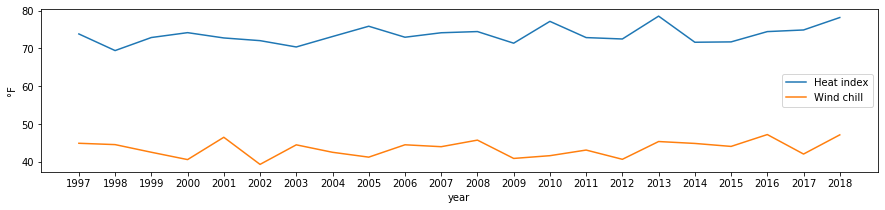

{'1997': 73.84104797779771, '1998': 69.4449420777016, '1999': 72.8973538914087, '2000': 74.18446772419158, '2001': 72.78346617545148, '2002': 72.07036477268, '2003': 70.39762179711275, '2004': 73.16047078941317, '2005': 75.88104429384002, '2006': 72.97301827884662, '2007': 74.15749293914939, '2008': 74.47112532861561, '2009': 71.39798938201719, '2010': 77.16925252212849, '2011': 72.88084067331145, '2012': 72.5095638400302, '2013': 78.55346453082247, '2014': 71.64671446378726, '2015': 71.7409447475798, '2016': 74.46235827790721, '2017': 74.89357848269215, '2018': 78.18423428384676}

{'1997': 44.9285965384766, '1998': 44.5753743014839, '1999': 42.55376475066351, '2000': 40.61338685402034, '2001': 46.51448097659528, '2002': 39.344845317697114, '2003': 44.516515729713134, '2004': 42.54369329231099, '2005': 41.25953633799744, '2006': 44.52834913716651, '2007': 44.023587687737546, '2008': 45.763188071719455, '2009': 40.919091494464034, '2010': 41.646510338514375, '2011': 43.13540280303614, '

In [5]:
show_all(0)

Heat index & Wind chill at ./newdata/철원(95).csv

Relation: 38%


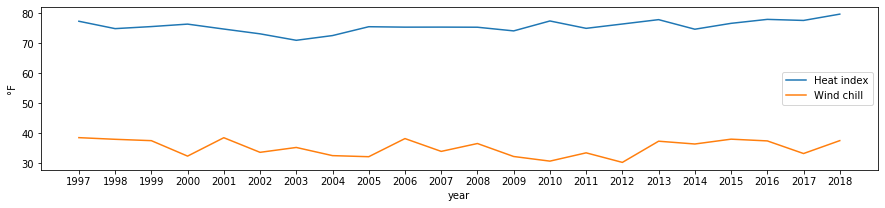

{'1997': 77.3489181548402, '1998': 74.88656471359656, '1999': 75.57142049274078, '2000': 76.3926414456823, '2001': 74.7473162361196, '2002': 73.1522199496464, '2003': 70.99572816739888, '2004': 72.5720965538547, '2005': 75.52427108252725, '2006': 75.38067491830941, '2007': 75.3938981147762, '2008': 75.35518990538193, '2009': 74.13037414797121, '2010': 77.44204013253524, '2011': 74.9833514936164, '2012': 76.42922856007786, '2013': 77.88572518713272, '2014': 74.6896658021257, '2015': 76.65187279464023, '2016': 77.97293953531566, '2017': 77.61817688919062, '2018': 79.72289873213379}

{'1997': 38.520170024631554, '1998': 37.969338811542656, '1999': 37.51715896405049, '2000': 32.36085633482908, '2001': 38.498857073586976, '2002': 33.62126604130672, '2003': 35.246825554293906, '2004': 32.52245461383566, '2005': 32.16049680708925, '2006': 38.21058199255826, '2007': 33.935758403009935, '2008': 36.56039129282843, '2009': 32.231282357321135, '2010': 30.685739486068382, '2011': 33.45267294833699,

In [6]:
show_all(1)

Heat index & Wind chill at ./newdata/대관령(100).csv

Relation: 42%


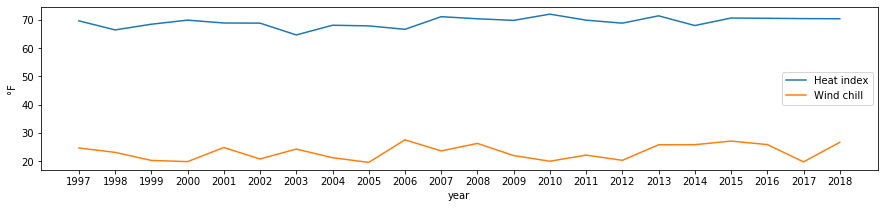

{'1997': 69.64124227262495, '1998': 66.43639822869697, '1999': 68.45248861934135, '2000': 69.90211434896446, '2001': 68.88414545879391, '2002': 68.83783363801686, '2003': 64.66477322902644, '2004': 68.0916811696829, '2005': 67.87076370938372, '2006': 66.64876137471298, '2007': 71.11816341202118, '2008': 70.38192287562292, '2009': 69.80957706074172, '2010': 72.02020031648753, '2011': 69.88366286926747, '2012': 68.83042261652432, '2013': 71.41982565387606, '2014': 67.98582420071023, '2015': 70.64664391078057, '2016': 70.54916033175306, '2017': 70.44097441610758, '2018': 70.38348892019802}

{'1997': 24.691339157208056, '1998': 23.15841171879977, '1999': 20.30112253408473, '2000': 19.87461436588977, '2001': 24.873602446157946, '2002': 20.80735199270288, '2003': 24.323071053000916, '2004': 21.264497790410463, '2005': 19.606872001303728, '2006': 27.577851920811575, '2007': 23.669750476521205, '2008': 26.309837358168625, '2009': 22.02003552751661, '2010': 20.01892578443064, '2011': 22.1781789

In [7]:
show_all(2)

Heat index & Wind chill at ./newdata/춘천(101).csv

Relation: 38%


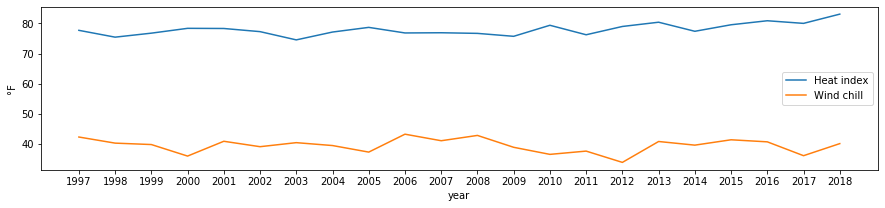

{'1997': 77.69354991760407, '1998': 75.43035813426168, '1999': 76.75762206027663, '2000': 78.35784159967855, '2001': 78.30789123373698, '2002': 77.2615044670479, '2003': 74.52548188909732, '2004': 77.12587329670062, '2005': 78.67473839952179, '2006': 76.82479980513831, '2007': 76.89251371448258, '2008': 76.68444257731453, '2009': 75.71052591189746, '2010': 79.37238685663303, '2011': 76.22390095408045, '2012': 78.97746596851721, '2013': 80.38555016189473, '2014': 77.37753148786997, '2015': 79.541876684471, '2016': 80.87308011242011, '2017': 80.00261306988244, '2018': 83.06895628185356}

{'1997': 42.29923310903993, '1998': 40.27484426594592, '1999': 39.80450233672356, '2000': 35.97804704060631, '2001': 40.89025659297346, '2002': 39.09223797636307, '2003': 40.43101169538541, '2004': 39.472965442957886, '2005': 37.29777236165601, '2006': 43.24124618296968, '2007': 41.06912691830716, '2008': 42.830614135613416, '2009': 38.889790467506074, '2010': 36.544649150856614, '2011': 37.6286383297597

In [8]:
show_all(3)

Heat index & Wind chill at ./newdata/강릉(105).csv

Relation: 42%


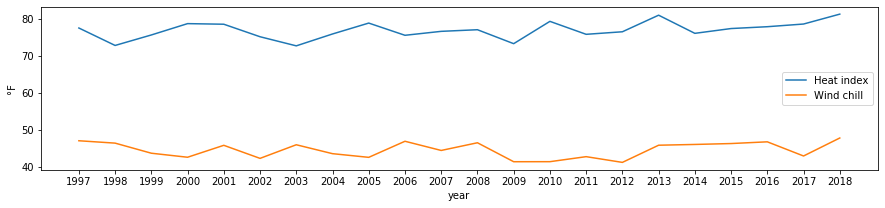

{'1997': 77.4560033246409, '1998': 72.75534183409228, '1999': 75.58071622010091, '2000': 78.63614202633637, '2001': 78.4742029741015, '2002': 75.10208295962538, '2003': 72.64639426715576, '2004': 75.8463071205635, '2005': 78.78453288190732, '2006': 75.49218674681792, '2007': 76.55472597336824, '2008': 76.99346277716688, '2009': 73.23283221519749, '2010': 79.24569974167878, '2011': 75.75603663608099, '2012': 76.43983955909495, '2013': 80.90927948651479, '2014': 76.0197162180623, '2015': 77.31053226755614, '2016': 77.80514181473843, '2017': 78.52716700095782, '2018': 81.19437818429977}

{'1997': 47.072458530946236, '1998': 46.431997307663856, '1999': 43.71331674714555, '2000': 42.62789606552757, '2001': 45.843575647381506, '2002': 42.32334402066368, '2003': 45.99303277097422, '2004': 43.59074126037739, '2005': 42.601559336930606, '2006': 46.93472354652809, '2007': 44.45796551192867, '2008': 46.530814480923276, '2009': 41.42077280442446, '2010': 41.432468016274036, '2011': 42.784058392482

In [9]:
show_all(4)

Heat index & Wind chill at ./newdata/동해(106).csv

Relation: 38%


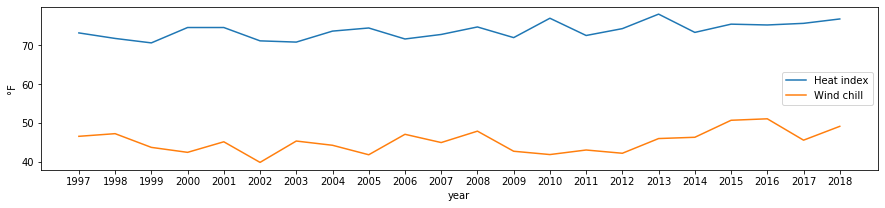

{'1997': 73.19253877188287, '1998': 71.76810729811875, '1999': 70.62032497672391, '2000': 74.58372005747945, '2001': 74.58420805026671, '2002': 71.14420955581959, '2003': 70.82422906597425, '2004': 73.65766996341283, '2005': 74.46281156200187, '2006': 71.62791056125074, '2007': 72.79347115416786, '2008': 74.7286242723758, '2009': 71.98068580042687, '2010': 76.97710773942862, '2011': 72.52781789249893, '2012': 74.29762709986315, '2013': 78.03534893529863, '2014': 73.3249920067897, '2015': 75.45049100758938, '2016': 75.23957353486456, '2017': 75.65886553777462, '2018': 76.7912574675522}

{'1997': 46.52672136569976, '1998': 47.211360135351896, '1999': 43.675584677667764, '2000': 42.393334764368326, '2001': 45.116108223065346, '2002': 39.80466549546876, '2003': 45.30893221260035, '2004': 44.21773084932323, '2005': 41.77247325240425, '2006': 47.047075763254604, '2007': 44.91914276017161, '2008': 47.861580453643306, '2009': 42.67576558943575, '2010': 41.82370549937449, '2011': 42.99804185888

In [10]:
show_all(5)

Heat index & Wind chill at ./newdata/서울(108).csv

Relation: 38%


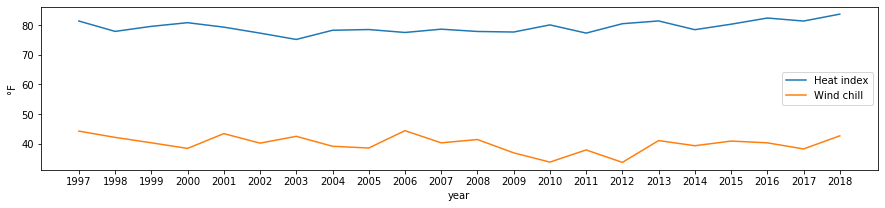

{'1997': 81.39622079713385, '1998': 77.9006868471323, '1999': 79.60320915957753, '2000': 80.83987248269449, '2001': 79.33736495770576, '2002': 77.31725375999594, '2003': 75.18265142317236, '2004': 78.28204768469523, '2005': 78.52789066571101, '2006': 77.53875164629918, '2007': 78.65191123473939, '2008': 77.87638820974108, '2009': 77.68833982648918, '2010': 80.09426782773103, '2011': 77.32542053350669, '2012': 80.49493303701946, '2013': 81.4293183082586, '2014': 78.47973326127331, '2015': 80.32577532896885, '2016': 82.4139672400568, '2017': 81.39292364451659, '2018': 83.72557527273226}

{'1997': 44.25578506009321, '1998': 42.14285801320843, '1999': 40.31860039970142, '2000': 38.42660815325181, '2001': 43.4094651264391, '2002': 40.20229748353128, '2003': 42.503533743146356, '2004': 39.14507448594419, '2005': 38.55329507560656, '2006': 44.416776417964364, '2007': 40.308492117543956, '2008': 41.42066336135282, '2009': 36.92983896054486, '2010': 33.80327483175426, '2011': 37.91170014991499,

In [11]:
show_all(6)

Heat index & Wind chill at ./newdata/인천(112).csv

Relation: 38%


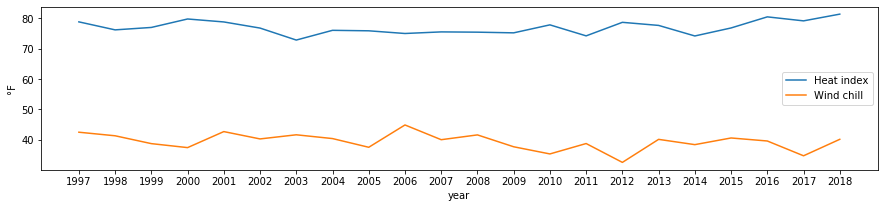

{'1997': 78.85097989632607, '1998': 76.21456580934304, '1999': 77.01460886269972, '2000': 79.80003283111171, '2001': 78.8254123287721, '2002': 76.80664879028285, '2003': 72.8580678327246, '2004': 76.06525503849329, '2005': 75.90583975594694, '2006': 75.02089058486582, '2007': 75.54668042682701, '2008': 75.45577027046986, '2009': 75.23392237947465, '2010': 77.86404189434201, '2011': 74.23982342448141, '2012': 78.69770781809085, '2013': 77.68352852922679, '2014': 74.20515173594589, '2015': 76.84466052658138, '2016': 80.49840978018992, '2017': 79.17956897901843, '2018': 81.39780051287762}

{'1997': 42.50551378735441, '1998': 41.33220211425463, '1999': 38.74754224447981, '2000': 37.43383759205648, '2001': 42.71137921081369, '2002': 40.29432141161537, '2003': 41.65644281492949, '2004': 40.41177447178212, '2005': 37.54360590019226, '2006': 44.8946310070326, '2007': 40.040567942954254, '2008': 41.622217800601824, '2009': 37.71184789420657, '2010': 35.351457902980414, '2011': 38.77602628842469

In [12]:
show_all(7)

Heat index & Wind chill at ./newdata/원주(114).csv

Relation: 52%


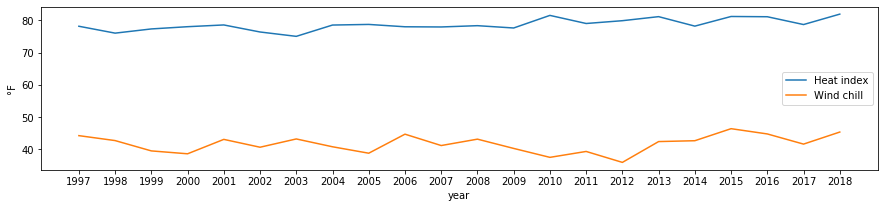

{'1997': 78.1583359735638, '1998': 76.02583426301817, '1999': 77.32746902974581, '2000': 78.01936695467442, '2001': 78.56076863820331, '2002': 76.38170969592893, '2003': 75.02977560915872, '2004': 78.53145721908965, '2005': 78.72308073757485, '2006': 77.99627317046043, '2007': 77.93766817176565, '2008': 78.33644641860569, '2009': 77.6207778814479, '2010': 81.51966422014425, '2011': 79.01135592043155, '2012': 79.87837287741549, '2013': 81.13291283798226, '2014': 78.1968843128668, '2015': 81.18318647905488, '2016': 81.10460789717214, '2017': 78.68379027824685, '2018': 81.91139952376543}

{'1997': 44.27709320039874, '1998': 42.74937421866502, '1999': 39.552593157580304, '2000': 38.658309817783305, '2001': 43.11913300597052, '2002': 40.6908342598091, '2003': 43.254818555192294, '2004': 40.83135775280174, '2005': 38.83759808353907, '2006': 44.7342760113764, '2007': 41.21260463167827, '2008': 43.191116855060216, '2009': 40.32078439198025, '2010': 37.55376978718653, '2011': 39.38424328199622,

In [13]:
show_all(8)

Heat index & Wind chill at ./newdata/울릉도(115).csv

Relation: 47%


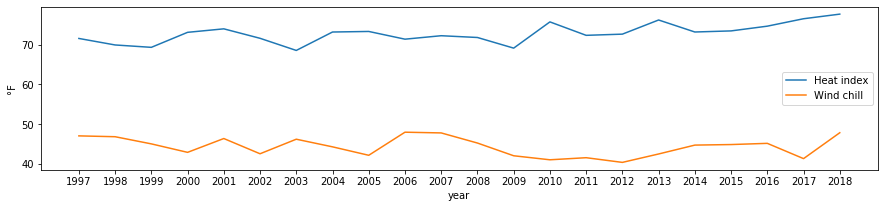

{'1997': 71.58608221092305, '1998': 69.94784545183347, '1999': 69.34877796640534, '2000': 73.12885835671895, '2001': 74.00884269752528, '2002': 71.62626375257001, '2003': 68.56892564310041, '2004': 73.20876802181502, '2005': 73.34992651551916, '2006': 71.40590099122953, '2007': 72.27569264250594, '2008': 71.83053923052422, '2009': 69.15057469846714, '2010': 75.75744087875911, '2011': 72.37314966546755, '2012': 72.67327350818906, '2013': 76.23639764654222, '2014': 73.21336242243132, '2015': 73.4878929864261, '2016': 74.68303342949521, '2017': 76.55247449641712, '2018': 77.71328049040255}

{'1997': 47.048680715258634, '1998': 46.836524622555686, '1999': 45.032924209138045, '2000': 42.89931901149592, '2001': 46.3812003964052, '2002': 42.54277669150157, '2003': 46.20879938598837, '2004': 44.28765457610789, '2005': 42.159435450057025, '2006': 47.975404896598434, '2007': 47.791842660668365, '2008': 45.244946096398074, '2009': 42.03967076797297, '2010': 41.02524993099603, '2011': 41.550559045

In [14]:
show_all(9)

Heat index & Wind chill at ./newdata/수원(119).csv

Relation: 47%


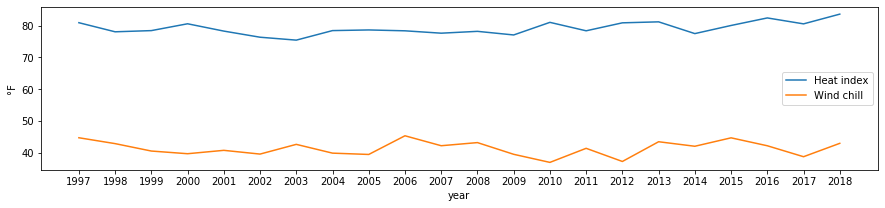

{'1997': 80.93397115062542, '1998': 78.07138836835203, '1999': 78.4463037142471, '2000': 80.59687005420355, '2001': 78.29380519957685, '2002': 76.36481169439381, '2003': 75.44737748604412, '2004': 78.4508311184527, '2005': 78.65484449499544, '2006': 78.38152373104288, '2007': 77.63509157371122, '2008': 78.21352699020217, '2009': 77.07683193540055, '2010': 81.04441804994858, '2011': 78.38617294730969, '2012': 80.8943902508684, '2013': 81.20547998918478, '2014': 77.50387049958485, '2015': 80.06210759987394, '2016': 82.4359670516587, '2017': 80.56868978207747, '2018': 83.63327381568661}

{'1997': 44.71210631586586, '1998': 42.86481770075665, '1999': 40.52949294906699, '2000': 39.68545219845081, '2001': 40.74861660453928, '2002': 39.5713034733227, '2003': 42.630829106149875, '2004': 39.8673965819687, '2005': 39.453250166293785, '2006': 45.33465430819377, '2007': 42.20143014049366, '2008': 43.186380927461485, '2009': 39.50075736493724, '2010': 36.95593687500665, '2011': 41.385525626170306, 

In [15]:
show_all(10)

Heat index & Wind chill at ./newdata/영월(121).csv

Relation: 47%


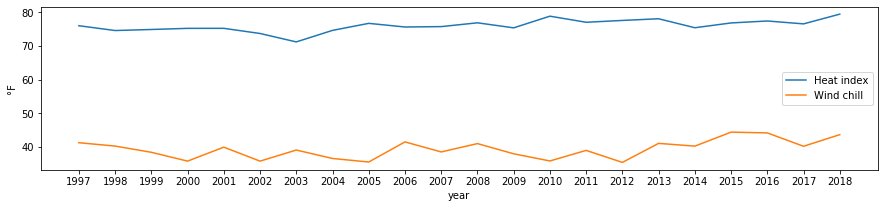

{'1997': 76.03725077755064, '1998': 74.60427047483087, '1999': 74.91504717396968, '2000': 75.25201017085958, '2001': 75.25911125978617, '2002': 73.7267938906245, '2003': 71.22127974734012, '2004': 74.65041227606261, '2005': 76.73741563891676, '2006': 75.65666525817791, '2007': 75.76999900847592, '2008': 76.90123180882976, '2009': 75.40395317587726, '2010': 78.87381156975363, '2011': 77.06309212170629, '2012': 77.60722900771779, '2013': 78.10413737506553, '2014': 75.43614238434967, '2015': 76.86073482204178, '2016': 77.44529195390464, '2017': 76.58437341097915, '2018': 79.48166212191408}

{'1997': 41.24933615304977, '1998': 40.2448149817968, '1999': 38.39750715928061, '2000': 35.77195215249353, '2001': 39.92520303934762, '2002': 35.76767499146344, '2003': 39.066742915122646, '2004': 36.55701206109067, '2005': 35.506761625408004, '2006': 41.487385393771255, '2007': 38.50357724757677, '2008': 40.98420760815207, '2009': 37.95128280172754, '2010': 35.81829767628172, '2011': 38.9607460587974

In [16]:
show_all(11)

Heat index & Wind chill at ./newdata/충주(127).csv

Relation: 57%


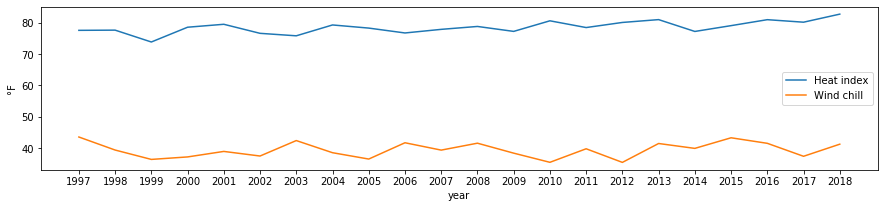

{'1997': 77.54826397228702, '1998': 77.61192742516552, '1999': 73.83890873819533, '2000': 78.53978264042344, '2001': 79.47683020456071, '2002': 76.59661371093921, '2003': 75.80732032579813, '2004': 79.26116123976753, '2005': 78.26430360387812, '2006': 76.71250714987623, '2007': 77.86161916767814, '2008': 78.78507291627082, '2009': 77.21379816685838, '2010': 80.58271285800227, '2011': 78.43505842231362, '2012': 80.05824751306139, '2013': 80.96271258739446, '2014': 77.19483727514147, '2015': 79.04530297257944, '2016': 80.94219696014925, '2017': 80.14148376634861, '2018': 82.70719994893217}

{'1997': 43.596023141827295, '1998': 39.44886054811401, '1999': 36.46345796256435, '2000': 37.25368150614075, '2001': 39.007014462857214, '2002': 37.54280871429745, '2003': 42.46118266040319, '2004': 38.59821599449109, '2005': 36.57802097005463, '2006': 41.76502506110799, '2007': 39.42371932845492, '2008': 41.62728577159867, '2009': 38.4564840261786, '2010': 35.540454107852625, '2011': 39.850120223900

In [17]:
show_all(12)

Heat index & Wind chill at ./newdata/서산(129).csv

Relation: 57%


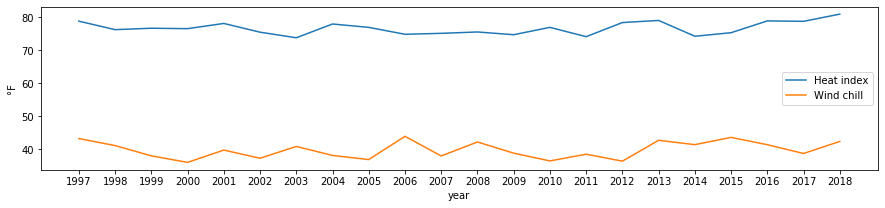

{'1997': 78.7816840932243, '1998': 76.22129261145325, '1999': 76.64714417443545, '2000': 76.52253810719516, '2001': 78.09881428002825, '2002': 75.45414962712924, '2003': 73.76024862637921, '2004': 77.92940652676496, '2005': 76.9112048879863, '2006': 74.81822928352925, '2007': 75.10212789374683, '2008': 75.51708700016316, '2009': 74.68780161492413, '2010': 76.91188027269253, '2011': 74.09673300209917, '2012': 78.36445698102452, '2013': 79.01007133710318, '2014': 74.21953298035696, '2015': 75.29439141615228, '2016': 78.86560243526714, '2017': 78.74017207795761, '2018': 80.91490170548205}

{'1997': 43.26447948405651, '1998': 41.14539760112368, '1999': 38.04025585242907, '2000': 36.060213875284376, '2001': 39.787364124256825, '2002': 37.30746689729723, '2003': 40.87932451175536, '2004': 38.167860028795026, '2005': 36.913950396745115, '2006': 43.942400377750914, '2007': 38.005096413721496, '2008': 42.23384331605105, '2009': 38.851117912962245, '2010': 36.50304415305399, '2011': 38.534138504

In [18]:
show_all(13)

Heat index & Wind chill at ./newdata/울진(130).csv

Relation: 42%


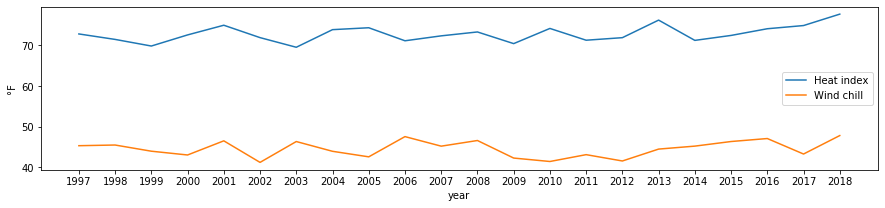

{'1997': 72.82156543743413, '1998': 71.47657737984292, '1999': 69.84694184750808, '2000': 72.58195158875863, '2001': 74.9658958281277, '2002': 71.91632508802618, '2003': 69.54513410593734, '2004': 73.8773279328971, '2005': 74.34614913554665, '2006': 71.13954295456078, '2007': 72.35251152812823, '2008': 73.31045832407327, '2009': 70.441237755081, '2010': 74.17671826709781, '2011': 71.2790656649433, '2012': 71.90563614256833, '2013': 76.22640799891718, '2014': 71.23861993657256, '2015': 72.4561023412547, '2016': 74.10187341889748, '2017': 74.88751541785992, '2018': 77.69693127268945}

{'1997': 45.32229595631383, '1998': 45.48874558890134, '1999': 43.96938069126425, '2000': 43.03810218381313, '2001': 46.51896861606247, '2002': 41.216013660777506, '2003': 46.34708138911337, '2004': 43.94479270073121, '2005': 42.581167562765295, '2006': 47.55981983810867, '2007': 45.208348666432805, '2008': 46.599476694500666, '2009': 42.27987760203798, '2010': 41.435805915041996, '2011': 43.11924241748576,

In [19]:
show_all(14)

Heat index & Wind chill at ./newdata/청주(131).csv

Relation: 38%


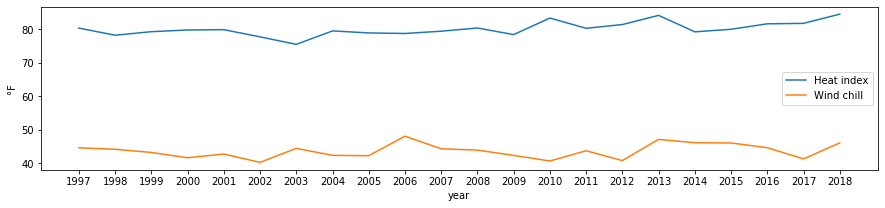

{'1997': 80.33344264872557, '1998': 78.20238959558593, '1999': 79.26055787394527, '2000': 79.7620745884303, '2001': 79.86299467674762, '2002': 77.71943953602492, '2003': 75.47814487060528, '2004': 79.49061385222066, '2005': 78.89053637504229, '2006': 78.72178838050957, '2007': 79.4041557818736, '2008': 80.35233454142214, '2009': 78.39446407724031, '2010': 83.32092120270572, '2011': 80.27313295838044, '2012': 81.38485383543268, '2013': 84.12007892310389, '2014': 79.21399651022979, '2015': 79.97772532600406, '2016': 81.6094564905474, '2017': 81.73932421767613, '2018': 84.49294006288491}

{'1997': 44.63971306427719, '1998': 44.20442974203006, '1999': 43.246633562757054, '2000': 41.67631306224402, '2001': 42.77380454746999, '2002': 40.28889332995018, '2003': 44.47583144269526, '2004': 42.39246129736534, '2005': 42.28913672745226, '2006': 48.101727540693254, '2007': 44.342435465421175, '2008': 43.94929318771202, '2009': 42.37524320237827, '2010': 40.703049787389006, '2011': 43.7588751493112

In [20]:
show_all(15)

Heat index & Wind chill at ./newdata/대전(133).csv

Relation: 52%


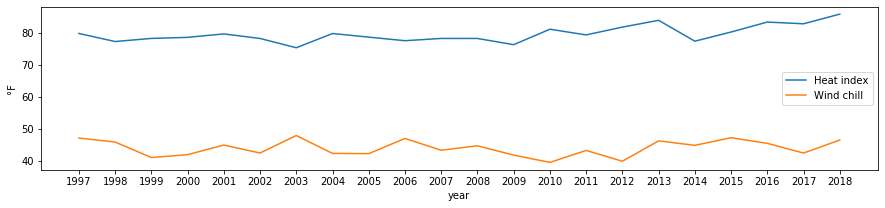

{'1997': 79.71430688221966, '1998': 77.19600476022515, '1999': 78.1645442329716, '2000': 78.49702887924248, '2001': 79.56752452481518, '2002': 78.15125655118511, '2003': 75.25783399965802, '2004': 79.69257039753981, '2005': 78.56882667157255, '2006': 77.45083184871433, '2007': 78.15935805057369, '2008': 78.15197343532938, '2009': 76.21861597781057, '2010': 81.03215006466782, '2011': 79.26007325283248, '2012': 81.6935314162054, '2013': 83.80905884500775, '2014': 77.30268520967401, '2015': 80.16265362227085, '2016': 83.26489509568802, '2017': 82.72684230060759, '2018': 85.73811379706575}

{'1997': 47.09701381711304, '1998': 45.86147910263641, '1999': 41.02188187084469, '2000': 41.91754143699958, '2001': 44.91047263874364, '2002': 42.42621746158197, '2003': 47.89130345051835, '2004': 42.30659545822909, '2005': 42.237141668768956, '2006': 46.96894085866707, '2007': 43.29733259217624, '2008': 44.688612756797184, '2009': 41.77400314970538, '2010': 39.50991368437475, '2011': 43.23709791158008

In [21]:
show_all(16)

Heat index & Wind chill at ./newdata/추풍령(135).csv

Relation: 52%


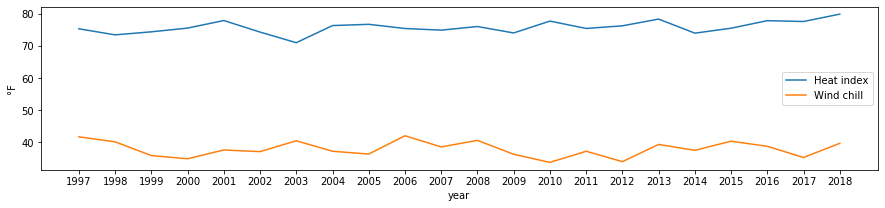

{'1997': 75.37001670956775, '1998': 73.4793762789764, '1999': 74.42915414961264, '2000': 75.5950565409003, '2001': 77.9561968148902, '2002': 74.35194952021381, '2003': 71.03530737474121, '2004': 76.37915351814694, '2005': 76.77061244236221, '2006': 75.46750241921313, '2007': 74.95543640177003, '2008': 76.083766356471, '2009': 74.07830357500877, '2010': 77.77961505649222, '2011': 75.48184661353595, '2012': 76.30202823412415, '2013': 78.41144405666148, '2014': 74.01269246554311, '2015': 75.55583873875233, '2016': 77.91434404977343, '2017': 77.65302865764272, '2018': 79.95479455001738}

{'1997': 41.63494375995815, '1998': 40.070986169399006, '1999': 35.784001928027656, '2000': 34.77660562994762, '2001': 37.52333878233354, '2002': 37.01553975963934, '2003': 40.39666313682375, '2004': 37.12772921780774, '2005': 36.252169769767285, '2006': 41.9696213595931, '2007': 38.47965135075624, '2008': 40.52433206429166, '2009': 36.18143378980149, '2010': 33.650073829173365, '2011': 37.129744655526906,

In [22]:
show_all(17)

Heat index & Wind chill at ./newdata/안동(136).csv

Relation: 57%


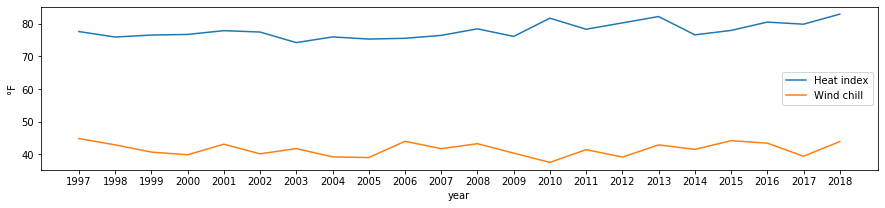

{'1997': 77.59565997406376, '1998': 75.91491806276912, '1999': 76.5189857607318, '2000': 76.71368986242686, '2001': 77.86821703038073, '2002': 77.44608638074668, '2003': 74.20850632759343, '2004': 75.95459248891389, '2005': 75.296967301816, '2006': 75.52787170972842, '2007': 76.42436020677363, '2008': 78.42614040874938, '2009': 76.10744401353455, '2010': 81.69135678427105, '2011': 78.30194662442618, '2012': 80.2410223015732, '2013': 82.19009487964001, '2014': 76.57849318682929, '2015': 77.94224762582148, '2016': 80.49033403260762, '2017': 79.84625468142464, '2018': 82.92608287572962}

{'1997': 44.84856301690359, '1998': 42.90920804580508, '1999': 40.706559073879575, '2000': 39.87849073369391, '2001': 43.11496717874265, '2002': 40.168580772817066, '2003': 41.76852476419941, '2004': 39.24170406603695, '2005': 39.02734124467687, '2006': 43.998737899964205, '2007': 41.745195303911906, '2008': 43.26906537522814, '2009': 40.37225532006507, '2010': 37.548658104146874, '2011': 41.4567354024487

In [23]:
show_all(18)

Heat index & Wind chill at ./newdata/포항(138).csv

Relation: 57%


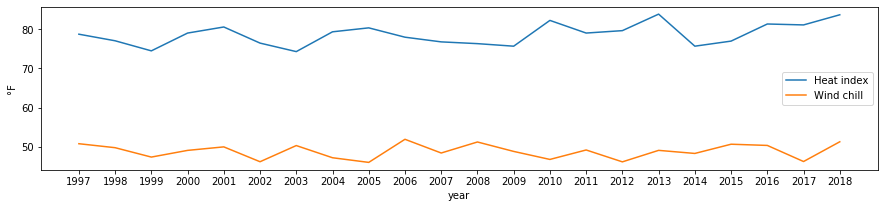

{'1997': 78.76504350461077, '1998': 77.08200648318395, '1999': 74.50267716259951, '2000': 79.05448431567306, '2001': 80.60964272240435, '2002': 76.48666411945504, '2003': 74.31041231987649, '2004': 79.37561289322251, '2005': 80.3874868844048, '2006': 77.99907360603048, '2007': 76.80068478994761, '2008': 76.34869520014675, '2009': 75.69727167072, '2010': 82.29395407389109, '2011': 79.05827762372056, '2012': 79.6745648030799, '2013': 83.89842606807743, '2014': 75.69982172446959, '2015': 76.9972014261066, '2016': 81.37453501013842, '2017': 81.13754173296618, '2018': 83.73310461563527}

{'1997': 50.744522973648934, '1998': 49.727857433559656, '1999': 47.32608838361815, '2000': 49.03826781651514, '2001': 49.93595912087784, '2002': 46.13599921658757, '2003': 50.271664656530945, '2004': 47.15594296541958, '2005': 45.967948919848304, '2006': 51.87632694434024, '2007': 48.36762191533633, '2008': 51.187735588053926, '2009': 48.77619360362033, '2010': 46.72418504486759, '2011': 49.1447083737257, 

In [24]:
show_all(19)

Heat index & Wind chill at ./newdata/군산(140).csv

Relation: 66%


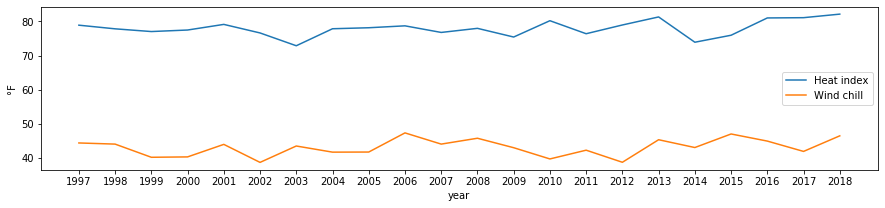

{'1997': 78.90768847458774, '1998': 77.83779317812139, '1999': 77.0381979642362, '2000': 77.48723928832271, '2001': 79.13880960172438, '2002': 76.62714419070244, '2003': 72.86819798845173, '2004': 77.86072640928185, '2005': 78.15504172201997, '2006': 78.71524812853309, '2007': 76.77671926289497, '2008': 77.97983033595105, '2009': 75.42919830093065, '2010': 80.22179123632793, '2011': 76.39968897738012, '2012': 78.96621762030315, '2013': 81.32839458469495, '2014': 73.90276062897472, '2015': 75.95368118386239, '2016': 81.03390909206526, '2017': 81.11262098562256, '2018': 82.1525191133563}

{'1997': 44.321647538429616, '1998': 43.98462240683883, '1999': 40.115705477018764, '2000': 40.226076802262114, '2001': 43.90389941134535, '2002': 38.61611137129356, '2003': 43.427148305426414, '2004': 41.62398563514829, '2005': 41.65536447971394, '2006': 47.27784631638225, '2007': 43.98591291749416, '2008': 45.70693357167188, '2009': 42.927776481192026, '2010': 39.62638603069273, '2011': 42.20084533479

In [25]:
show_all(20)

Heat index & Wind chill at ./newdata/대구(143).csv

Relation: 52%


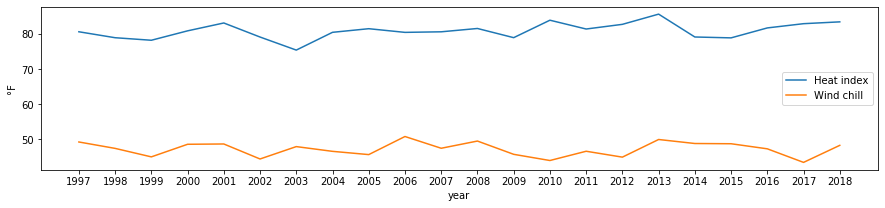

{'1997': 80.61408309560913, '1998': 78.92129183048306, '1999': 78.20066973172565, '2000': 80.87707548447395, '2001': 83.11490216765645, '2002': 79.11757792969601, '2003': 75.40188246712476, '2004': 80.45673735939842, '2005': 81.48614764733144, '2006': 80.442916601523, '2007': 80.60399633095986, '2008': 81.55049460427188, '2009': 78.93768327658941, '2010': 83.90149938361101, '2011': 81.39730255355178, '2012': 82.72576758206878, '2013': 85.63036942982203, '2014': 79.12806530927334, '2015': 78.87884776369215, '2016': 81.70712475319837, '2017': 82.91277349930779, '2018': 83.4327228873409}

{'1997': 49.265042414203066, '1998': 47.444623283560965, '1999': 45.02950891408756, '2000': 48.61224036099844, '2001': 48.696710789115, '2002': 44.43027044390664, '2003': 47.950116849351595, '2004': 46.603944783507984, '2005': 45.677175496702574, '2006': 50.8220393969314, '2007': 47.47997422192074, '2008': 49.53145907330017, '2009': 45.75490372227422, '2010': 43.99428169733462, '2011': 46.62906189787772,

In [26]:
show_all(21)

Heat index & Wind chill at ./newdata/전주(146).csv

Relation: 61%


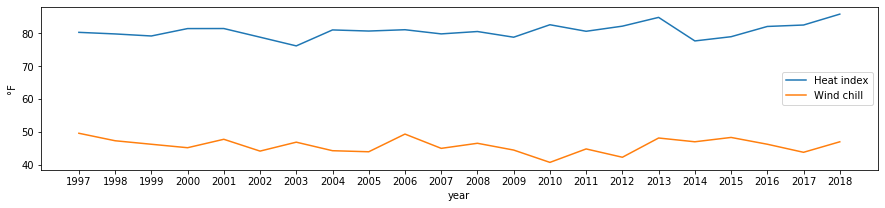

{'1997': 80.24062193941985, '1998': 79.75943713109538, '1999': 79.13572621537895, '2000': 81.38599403457042, '2001': 81.40163723813441, '2002': 78.77452790830385, '2003': 76.12614357990473, '2004': 80.9759317968283, '2005': 80.6378664145336, '2006': 81.03879691741638, '2007': 79.77163160342627, '2008': 80.49222766389356, '2009': 78.76309604512112, '2010': 82.55102786776293, '2011': 80.56697117894622, '2012': 82.12201625509574, '2013': 84.78800733370544, '2014': 77.63367684815113, '2015': 78.91460220073952, '2016': 82.02964496895368, '2017': 82.46863144683843, '2018': 85.77637739303873}

{'1997': 49.5762670361633, '1998': 47.302454759342325, '1999': 46.23567732410443, '2000': 45.18292587040965, '2001': 47.74566850841997, '2002': 44.154423417335835, '2003': 46.869422345219235, '2004': 44.27483145830758, '2005': 43.953043963097045, '2006': 49.32934535661528, '2007': 44.98935792944202, '2008': 46.532662172455154, '2009': 44.472115680437106, '2010': 40.72603792725115, '2011': 44.81418331875

In [27]:
show_all(22)

Heat index & Wind chill at ./newdata/울산(152).csv

Relation: 52%


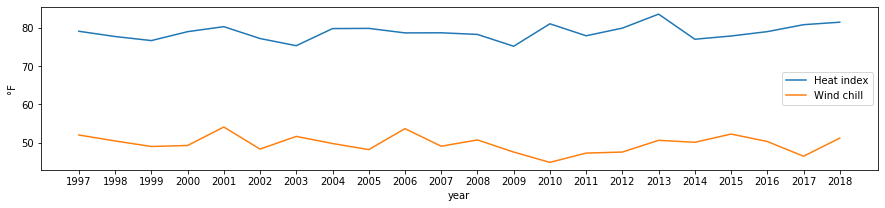

{'1997': 79.04484323268682, '1998': 77.68020490335454, '1999': 76.61987593874906, '2000': 78.94003246971009, '2001': 80.24413772015356, '2002': 77.15737341466968, '2003': 75.29212734195272, '2004': 79.74449055857656, '2005': 79.79621734199233, '2006': 78.62139091733702, '2007': 78.64757533480046, '2008': 78.2234907779534, '2009': 75.14778239166543, '2010': 80.9913706457774, '2011': 77.87324020123893, '2012': 79.86569268361937, '2013': 83.5038768741715, '2014': 76.97114884025606, '2015': 77.81372132043657, '2016': 78.95203956489267, '2017': 80.75818746350201, '2018': 81.40256986139208}

{'1997': 52.05813120734283, '1998': 50.50789831239992, '1999': 49.069920338712635, '2000': 49.32571010497936, '2001': 54.133429522281176, '2002': 48.392367157111956, '2003': 51.69428018455539, '2004': 49.84190368554466, '2005': 48.25917805243156, '2006': 53.70995557505663, '2007': 49.13438045927155, '2008': 50.777108401530064, '2009': 47.6187599609251, '2010': 44.93173438521288, '2011': 47.35178448292075

In [28]:
show_all(23)

Heat index & Wind chill at ./newdata/창원(155).csv

Relation: 52%


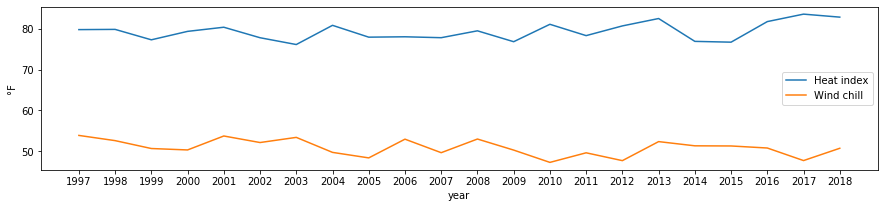

{'1997': 79.84934491640387, '1998': 79.90624528285475, '1999': 77.34665634891539, '2000': 79.41764780951365, '2001': 80.43533484235095, '2002': 77.8571250195927, '2003': 76.18715243324392, '2004': 80.90119573359843, '2005': 77.99602545390752, '2006': 78.0896814821174, '2007': 77.86665638400545, '2008': 79.55364319425021, '2009': 76.88144927878523, '2010': 81.1555887503002, '2011': 78.37433452538198, '2012': 80.75893285559195, '2013': 82.57288629138607, '2014': 76.96285714222911, '2015': 76.76731671694851, '2016': 81.82063490825642, '2017': 83.65149997126971, '2018': 82.91310054086189}

{'1997': 53.869757918022906, '1998': 52.59137044296647, '1999': 50.65498075601644, '2000': 50.304286864840925, '2001': 53.73095894529313, '2002': 52.12402275568103, '2003': 53.389252067300404, '2004': 49.70554333691533, '2005': 48.35237762704501, '2006': 52.94976977192863, '2007': 49.63207317154941, '2008': 52.984665699188625, '2009': 50.27028330691276, '2010': 47.24916596248163, '2011': 49.6027908250082

In [29]:
show_all(24)

Heat index & Wind chill at ./newdata/광주(156).csv

Relation: 47%


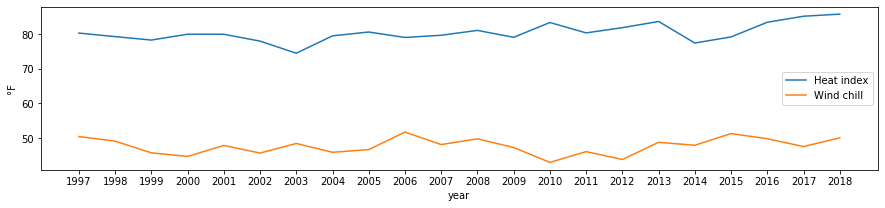

{'1997': 80.308728331867, '1998': 79.2925936143029, '1999': 78.29473813571876, '2000': 79.98551445754094, '2001': 79.97146884914389, '2002': 77.9947182366269, '2003': 74.4973446872097, '2004': 79.51253705164487, '2005': 80.61755209553033, '2006': 79.04453019909303, '2007': 79.68352768678214, '2008': 81.0833253992865, '2009': 79.09038967064158, '2010': 83.35828752703551, '2011': 80.35981633769498, '2012': 81.87414001900365, '2013': 83.65619486627774, '2014': 77.44214303863703, '2015': 79.20263917322289, '2016': 83.43775433007326, '2017': 85.17126895308331, '2018': 85.77697994922904}

{'1997': 50.46235657075579, '1998': 49.14053963859551, '1999': 45.76076720270077, '2000': 44.72318448262819, '2001': 47.89831819000564, '2002': 45.694601868979575, '2003': 48.46740666122102, '2004': 45.919640506498425, '2005': 46.693662912272636, '2006': 51.74619768251005, '2007': 48.14753144314451, '2008': 49.8068219110177, '2009': 47.297575665327884, '2010': 43.005581686377816, '2011': 46.1125584072363, '

In [30]:
show_all(25)

Heat index & Wind chill at ./newdata/부산(159).csv

Relation: 66%


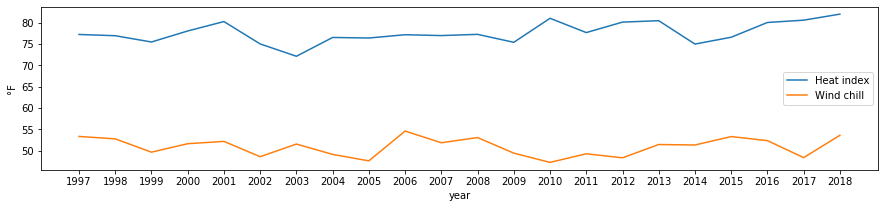

{'1997': 77.22210845765031, '1998': 76.93036274319446, '1999': 75.45824959686011, '2000': 78.04176761981206, '2001': 80.24701914274242, '2002': 75.00492198192127, '2003': 72.11581357540668, '2004': 76.52110852492615, '2005': 76.39291625313795, '2006': 77.16205181390103, '2007': 76.96371288936611, '2008': 77.24913613751357, '2009': 75.38426982975402, '2010': 81.01590123052493, '2011': 77.66614350839026, '2012': 80.11891600006484, '2013': 80.4507422929327, '2014': 74.97204129708314, '2015': 76.57442024249528, '2016': 80.03228638944086, '2017': 80.57483727913458, '2018': 81.98894849932057}

{'1997': 53.32429034472845, '1998': 52.75268899347048, '1999': 49.63969232581588, '2000': 51.62255229587218, '2001': 52.163396890802346, '2002': 48.57456455716842, '2003': 51.54065581895998, '2004': 49.11246823519144, '2005': 47.60195300387164, '2006': 54.582026264732136, '2007': 51.84312713375944, '2008': 53.06166315174488, '2009': 49.40875230778728, '2010': 47.24194783530469, '2011': 49.2561184675573

In [31]:
show_all(26)

Heat index & Wind chill at ./newdata/통영(162).csv

Relation: 52%


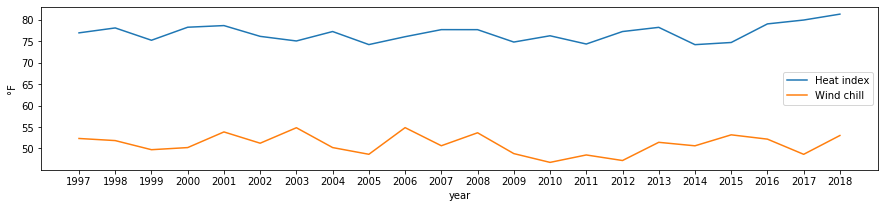

{'1997': 76.98616100673175, '1998': 78.13538592784984, '1999': 75.25985710891479, '2000': 78.30028919310277, '2001': 78.68501269159799, '2002': 76.17009042515843, '2003': 75.09320939461163, '2004': 77.29606452413934, '2005': 74.25004546315907, '2006': 76.08855393960825, '2007': 77.73851187115021, '2008': 77.73211871045439, '2009': 74.83959543354197, '2010': 76.30725960897061, '2011': 74.38148404626504, '2012': 77.29277334999618, '2013': 78.27212770667232, '2014': 74.23379712793314, '2015': 74.73763753687143, '2016': 79.0782668714141, '2017': 79.9796862086088, '2018': 81.35684049464965}

{'1997': 52.338111765450535, '1998': 51.84502075858935, '1999': 49.71677668421882, '2000': 50.21369550468729, '2001': 53.86515249406253, '2002': 51.2341067164394, '2003': 54.84480949090969, '2004': 50.21544965471669, '2005': 48.6471092721377, '2006': 54.86853489255199, '2007': 50.642591680794546, '2008': 53.66731817868833, '2009': 48.808390101311794, '2010': 46.75681326445319, '2011': 48.49091375306356,

In [32]:
show_all(27)

Heat index & Wind chill at ./newdata/무안(164).csv

Relation: 100%


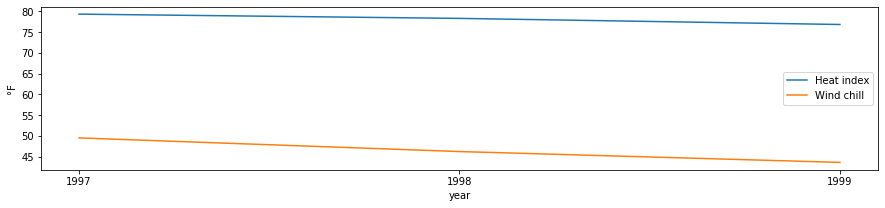

{'1997': 79.33032272510867, '1998': 78.30526992215789, '1999': 76.83577958317905}

{'1997': 49.53759057807176, '1998': 46.25128028143889, '1999': 43.643887093723244}


In [33]:
show_all(28)

Heat index & Wind chill at ./newdata/목포(165).csv

Relation: 47%


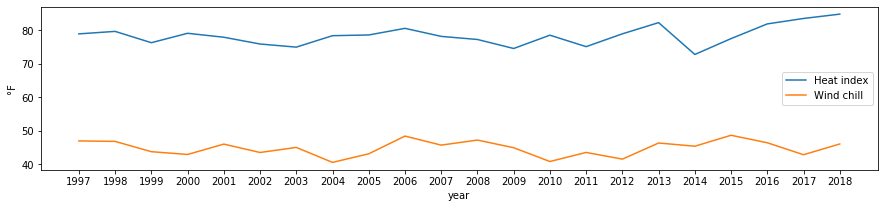

{'1997': 78.89438256243427, '1998': 79.63951901358152, '1999': 76.26185004602289, '2000': 79.07084898142622, '2001': 77.8936970738245, '2002': 75.87328191237427, '2003': 74.9415584525775, '2004': 78.3569033021848, '2005': 78.56730849693884, '2006': 80.54405457217972, '2007': 78.14855108315416, '2008': 77.22192150670118, '2009': 74.53362958099044, '2010': 78.50485502218172, '2011': 75.08432098229497, '2012': 78.90638460505598, '2013': 82.25127088979572, '2014': 72.75319274882614, '2015': 77.4869359032714, '2016': 81.87084366910285, '2017': 83.49336060079322, '2018': 84.7857400681424}

{'1997': 46.958045560374735, '1998': 46.81550038206067, '1999': 43.74612054902108, '2000': 42.91505319998113, '2001': 46.006081037734816, '2002': 43.506343026898, '2003': 45.01935528117553, '2004': 40.553352169814985, '2005': 43.11119437360719, '2006': 48.40592103852351, '2007': 45.70565080026193, '2008': 47.213435311626, '2009': 44.928884012941836, '2010': 40.81617016970122, '2011': 43.52126411798069, '20

In [34]:
show_all(29)

Heat index & Wind chill at ./newdata/여수(168).csv

Relation: 61%


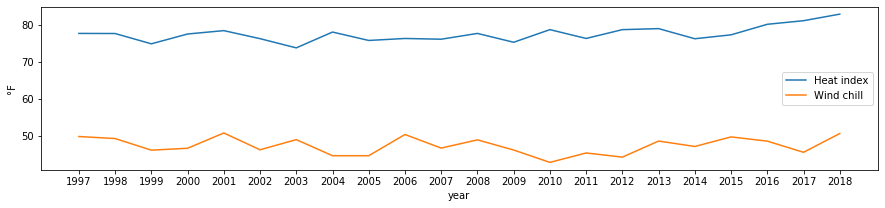

{'1997': 77.60935206549564, '1998': 77.58211785377081, '1999': 74.81018618472858, '2000': 77.45291794184007, '2001': 78.36217989219872, '2002': 76.19919607020881, '2003': 73.71850588532746, '2004': 77.9774930362781, '2005': 75.71660847862447, '2006': 76.24956666120262, '2007': 76.0508888141549, '2008': 77.60860511965602, '2009': 75.22833413659959, '2010': 78.62499058345743, '2011': 76.25427547337009, '2012': 78.62821533460084, '2013': 78.90110865562828, '2014': 76.17525180060065, '2015': 77.22976494539658, '2016': 80.0686892581879, '2017': 81.03393063426903, '2018': 82.8011458105963}

{'1997': 49.85959865846604, '1998': 49.31218921288018, '1999': 46.18969273742066, '2000': 46.69593383281569, '2001': 50.80949805188708, '2002': 46.28493817221811, '2003': 49.02403413462557, '2004': 44.69025491430943, '2005': 44.69294548670348, '2006': 50.4011908894189, '2007': 46.743675667562464, '2008': 48.96275071063958, '2009': 46.22232938979656, '2010': 42.89465723633304, '2011': 45.429685094145405, '

In [35]:
show_all(30)

Heat index & Wind chill at ./newdata/흑산도(169).csv

Relation: 42%


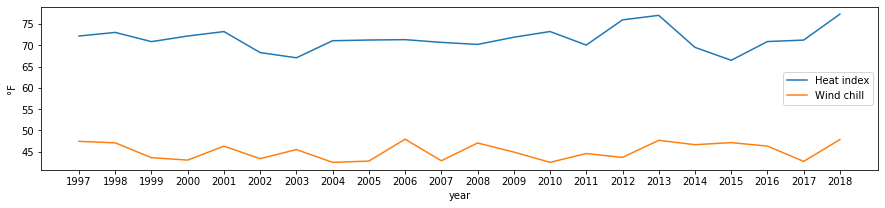

{'1997': 72.17150548125504, '1998': 73.01956513254781, '1999': 70.85315822296354, '2000': 72.17011965218585, '2001': 73.21687027906027, '2002': 68.28335410826146, '2003': 67.0580404523501, '2004': 71.06941303506954, '2005': 71.2305353259123, '2006': 71.32151664552485, '2007': 70.67544088172951, '2008': 70.19520075695709, '2009': 71.88839137302998, '2010': 73.22902194169353, '2011': 70.05189998164343, '2012': 75.96790455485407, '2013': 77.03069827030006, '2014': 69.50779279107394, '2015': 66.46783955562064, '2016': 70.87498554674607, '2017': 71.21649335833219, '2018': 77.31623393200422}

{'1997': 47.42022085542127, '1998': 47.07692763460779, '1999': 43.583139472868204, '2000': 43.02129722556536, '2001': 46.29581436559449, '2002': 43.35016090369231, '2003': 45.49106511756933, '2004': 42.47962936835291, '2005': 42.78591288289542, '2006': 47.9314302564511, '2007': 42.86309310554489, '2008': 47.03441001912374, '2009': 44.908024849686974, '2010': 42.48737181441185, '2011': 44.55711518297473,

In [36]:
show_all(31)

Heat index & Wind chill at ./newdata/완도(170).csv

Relation: 52%


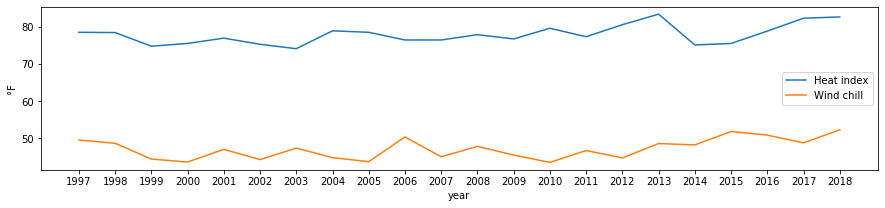

{'1997': 78.55711973060767, '1998': 78.48826841281121, '1999': 74.80249779658625, '2000': 75.54026916216431, '2001': 76.97724878566656, '2002': 75.31688938829934, '2003': 74.12690695776284, '2004': 78.95092375776076, '2005': 78.55844560148866, '2006': 76.48024975315522, '2007': 76.4826939523718, '2008': 77.91321266007323, '2009': 76.76463987492536, '2010': 79.6472905553356, '2011': 77.36384880047373, '2012': 80.60306851743509, '2013': 83.4609587704107, '2014': 75.14069688124805, '2015': 75.53595136763603, '2016': 78.88107200943364, '2017': 82.36408696877913, '2018': 82.70433314334582}

{'1997': 49.47042039586666, '1998': 48.599121231724254, '1999': 44.33906872420927, '2000': 43.530059407059134, '2001': 46.94708086120199, '2002': 44.182865122814334, '2003': 47.29565139740884, '2004': 44.71797285906462, '2005': 43.62285631525608, '2006': 50.29797810173533, '2007': 44.94874699528915, '2008': 47.76285141211327, '2009': 45.41353967877509, '2010': 43.43252013558011, '2011': 46.63457086686836

In [37]:
show_all(32)

Heat index & Wind chill at ./newdata/제주(184).csv

Relation: 42%


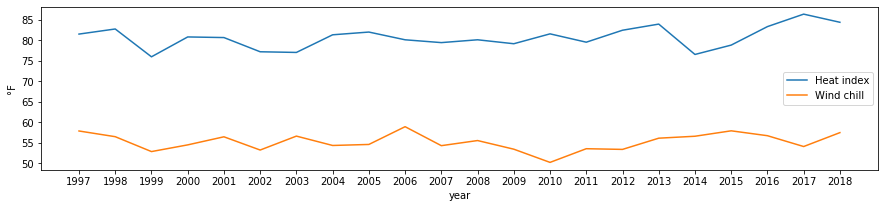

{'1997': 81.54143588392583, '1998': 82.78624344342934, '1999': 75.98778167219415, '2000': 80.84218011020174, '2001': 80.69018909134168, '2002': 77.21928992171847, '2003': 77.05541798876148, '2004': 81.36548474122837, '2005': 82.03568250695133, '2006': 80.14566699439168, '2007': 79.45694395305232, '2008': 80.14703031123643, '2009': 79.18233940455463, '2010': 81.59554529134222, '2011': 79.55928361393174, '2012': 82.48111032439895, '2013': 83.9793448882156, '2014': 76.56183791688414, '2015': 78.84885296828375, '2016': 83.36786907487645, '2017': 86.41558990656999, '2018': 84.42438240439522}

{'1997': 57.860410195384674, '1998': 56.4681255732283, '1999': 52.828944051503655, '2000': 54.465541217299936, '2001': 56.44094239622902, '2002': 53.20601276776284, '2003': 56.61030217766728, '2004': 54.32212204324018, '2005': 54.57008070759577, '2006': 58.91012736680365, '2007': 54.27406886181459, '2008': 55.52494024393875, '2009': 53.4134328814533, '2010': 50.18746731687533, '2011': 53.52943922592646

In [38]:
show_all(33)

Heat index & Wind chill at ./newdata/고산(185).csv

Relation: 38%


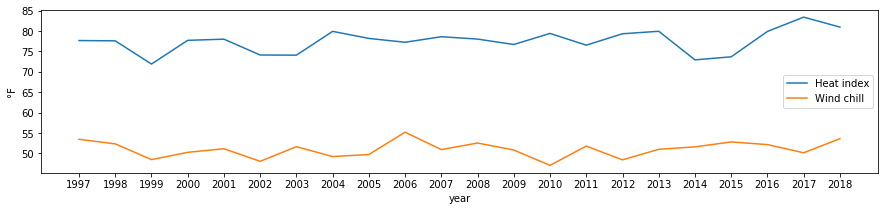

{'1997': 77.67431056789015, '1998': 77.60580472653588, '1999': 71.91455294799766, '2000': 77.72545498261057, '2001': 78.01293114467258, '2002': 74.13145236208037, '2003': 74.08956618574159, '2004': 79.92699112708769, '2005': 78.19637956054328, '2006': 77.25404322311383, '2007': 78.61465468503762, '2008': 78.03579620622773, '2009': 76.70329023210778, '2010': 79.4252153406866, '2011': 76.54412535965157, '2012': 79.3375280530429, '2013': 79.9474055406268, '2014': 72.94194098740626, '2015': 73.69105534796473, '2016': 79.91013946471547, '2017': 83.41491253854065, '2018': 80.97447586628384}

{'1997': 53.471018186735094, '1998': 52.34712184975585, '1999': 48.48993077246259, '2000': 50.270173769125385, '2001': 51.156128916494346, '2002': 48.067128846524504, '2003': 51.659822822217365, '2004': 49.23508983171495, '2005': 49.73403587252487, '2006': 55.21226239326623, '2007': 50.94376343073676, '2008': 52.55367190445575, '2009': 50.84010871255907, '2010': 47.07162224755159, '2011': 51.809401378030

In [39]:
show_all(34)

Heat index & Wind chill at ./newdata/성산(187).csv

Relation: 60%


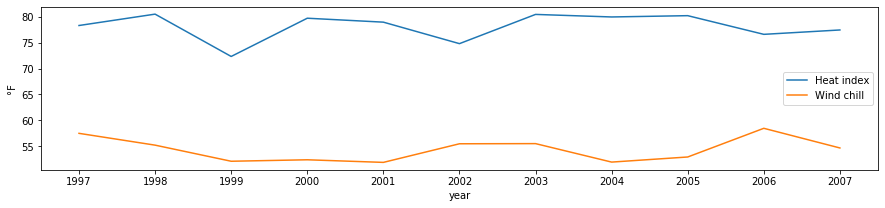

{'1997': 78.32812866219224, '1998': 80.52727238519387, '1999': 72.34293506917605, '2000': 79.73736343942805, '2001': 78.97682079683054, '2002': 74.82043211421902, '2003': 80.47242342107145, '2004': 79.9799453830382, '2005': 80.2308472124504, '2006': 76.61970439290143, '2007': 77.46441026844275}

{'1997': 57.4753576260676, '1998': 55.192538212497496, '1999': 52.078354187264104, '2000': 52.36209040080497, '2001': 51.858180618455684, '2002': 55.45745195777809, '2003': 55.486856186788245, '2004': 51.91563562716146, '2005': 52.90202034010959, '2006': 58.44880502635541, '2007': 54.64676207205405}


In [40]:
show_all(35)

Heat index & Wind chill at ./newdata/성산(188).csv

Relation: 47%


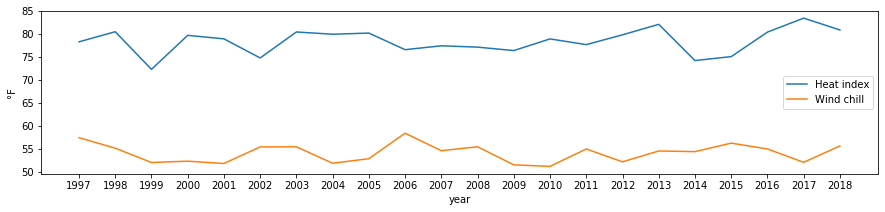

{'1997': 78.32812866219224, '1998': 80.52727238519387, '1999': 72.34293506917605, '2000': 79.73736343942805, '2001': 78.97682079683054, '2002': 74.82043211421902, '2003': 80.47242342107145, '2004': 79.9799453830382, '2005': 80.2308472124504, '2006': 76.61970439290143, '2007': 77.46441026844275, '2008': 77.1741468176781, '2009': 76.42879769725364, '2010': 78.96212078802343, '2011': 77.71838839590609, '2012': 79.85488289716072, '2013': 82.13563154432521, '2014': 74.25321463623321, '2015': 75.11140390196577, '2016': 80.44149748328027, '2017': 83.48311288041944, '2018': 80.91099716068938}

{'1997': 57.4753576260676, '1998': 55.192538212497496, '1999': 52.078354187264104, '2000': 52.36209040080497, '2001': 51.858180618455684, '2002': 55.45745195777809, '2003': 55.486856186788245, '2004': 51.91563562716146, '2005': 52.90202034010959, '2006': 58.44880502635541, '2007': 54.64676207205405, '2008': 55.49332756962729, '2009': 51.56254448476978, '2010': 51.22798493246703, '2011': 55.01414229890552

In [41]:
show_all(36)

Heat index & Wind chill at ./newdata/서귀포(189).csv

Relation: 52%


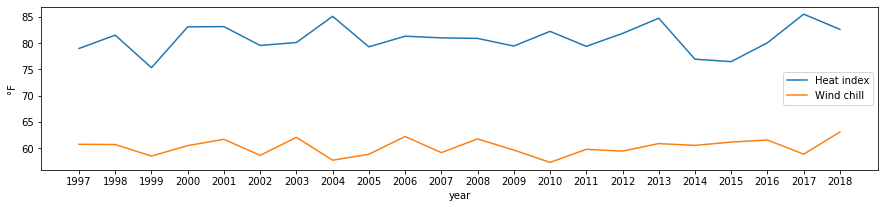

{'1997': 78.98259847062414, '1998': 81.522106308224, '1999': 75.31726364357313, '2000': 83.096822044749, '2001': 83.14562315245408, '2002': 79.55702744383612, '2003': 80.11517236640229, '2004': 85.10689584846992, '2005': 79.29413620040755, '2006': 81.31967687759312, '2007': 81.00242581519342, '2008': 80.90096181266792, '2009': 79.44198640650599, '2010': 82.24565291721075, '2011': 79.38685887171744, '2012': 81.84631305161369, '2013': 84.74419879409642, '2014': 76.93474214059708, '2015': 76.47829421848387, '2016': 80.06403056074288, '2017': 85.52580040953391, '2018': 82.62242755722657}

{'1997': 60.72075117854292, '1998': 60.676613590683, '1999': 58.478122621105584, '2000': 60.46851977005261, '2001': 61.671503551733196, '2002': 58.608596383268434, '2003': 62.04468535510635, '2004': 57.69161593425428, '2005': 58.8171133110713, '2006': 62.21051383693848, '2007': 59.13815817250075, '2008': 61.740084680626225, '2009': 59.62247420479434, '2010': 57.27165786774116, '2011': 59.761570702342944, 

In [42]:
show_all(37)

Heat index & Wind chill at ./newdata/진주(192).csv

Relation: 38%


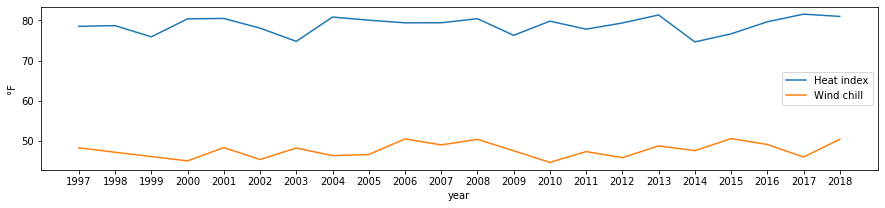

{'1997': 78.54266977519315, '1998': 78.70789078903904, '1999': 75.92083697718563, '2000': 80.40005670006245, '2001': 80.49913297800963, '2002': 78.0894270477114, '2003': 74.78836959291034, '2004': 80.8461286905138, '2005': 80.06878162320875, '2006': 79.4145681376792, '2007': 79.42813449506923, '2008': 80.4338635433392, '2009': 76.30237942358741, '2010': 79.82508398285499, '2011': 77.82573161648733, '2012': 79.3746275400687, '2013': 81.36747573277081, '2014': 74.64674575049757, '2015': 76.65751906899594, '2016': 79.66686175385016, '2017': 81.57582422319177, '2018': 81.00431387443834}

{'1997': 48.274689846709414, '1998': 47.16011194139327, '1999': 46.08007642522725, '2000': 45.01462988506465, '2001': 48.32606875711587, '2002': 45.34971846580411, '2003': 48.20940501904334, '2004': 46.32078950994413, '2005': 46.59571794158528, '2006': 50.485338249413736, '2007': 48.99361640009683, '2008': 50.37593647208448, '2009': 47.5266693529104, '2010': 44.633999473390844, '2011': 47.32495628407109, '

In [43]:
show_all(38)

Heat index & Wind chill at ./newdata/강화(201).csv

Relation: 47%


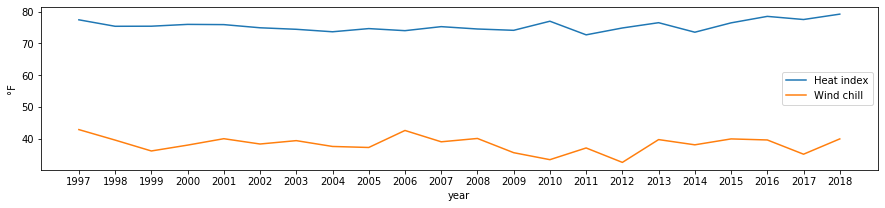

{'1997': 77.43687537906466, '1998': 75.40009985755168, '1999': 75.42359008403994, '2000': 75.99775864930702, '2001': 75.92521158096197, '2002': 74.9297406143675, '2003': 74.44962888153259, '2004': 73.67037250879523, '2005': 74.67165667457998, '2006': 74.01975532695394, '2007': 75.28606763854305, '2008': 74.54518607703496, '2009': 74.12955217822457, '2010': 76.99187801378476, '2011': 72.70603204390262, '2012': 74.86628344003121, '2013': 76.52886505931252, '2014': 73.53100973958959, '2015': 76.47783566756856, '2016': 78.51678239032313, '2017': 77.52927730967698, '2018': 79.22360713736572}

{'1997': 42.88053265167238, '1998': 39.5775045064227, '1999': 36.1526233880699, '2000': 37.99302459475573, '2001': 40.014609176530364, '2002': 38.34220846413797, '2003': 39.40472865108767, '2004': 37.57384911792381, '2005': 37.25193804448542, '2006': 42.60653995355581, '2007': 39.039850523965555, '2008': 40.09113621363613, '2009': 35.613197132953715, '2010': 33.414104951996165, '2011': 37.0991591773050

In [44]:
show_all(39)

Heat index & Wind chill at ./newdata/양평(202).csv

Relation: 47%


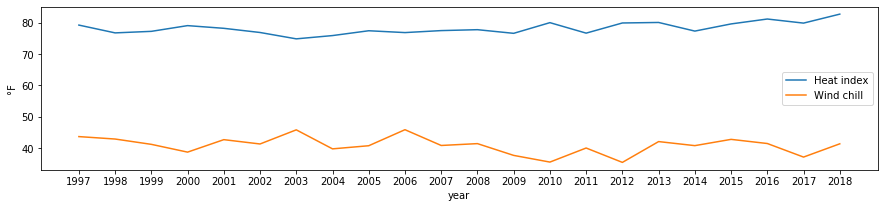

{'1997': 79.24359121897915, '1998': 76.75557312991644, '1999': 77.24654638058945, '2000': 79.07244679922773, '2001': 78.21293116143903, '2002': 76.88263381675053, '2003': 74.85575870625074, '2004': 75.89867146603736, '2005': 77.43677150885726, '2006': 76.85192067551966, '2007': 77.48759057416504, '2008': 77.7759981692609, '2009': 76.6153395028256, '2010': 80.02048767866734, '2011': 76.67698323449792, '2012': 79.91612889372605, '2013': 80.07876112904518, '2014': 77.32836993296986, '2015': 79.61366355041906, '2016': 81.1780958620231, '2017': 79.87336117365882, '2018': 82.73525955540806}

{'1997': 43.692617604244745, '1998': 42.91589351427176, '1999': 41.22059375354576, '2000': 38.74120510001423, '2001': 42.716541061495725, '2002': 41.34042531930387, '2003': 45.845942752951665, '2004': 39.781330124569934, '2005': 40.779850264375895, '2006': 45.89048231139216, '2007': 40.862929377524715, '2008': 41.45209036952476, '2009': 37.69887035790493, '2010': 35.56735202303328, '2011': 40.05188927045

In [45]:
show_all(40)

Heat index & Wind chill at ./newdata/이천(203).csv

Relation: 38%


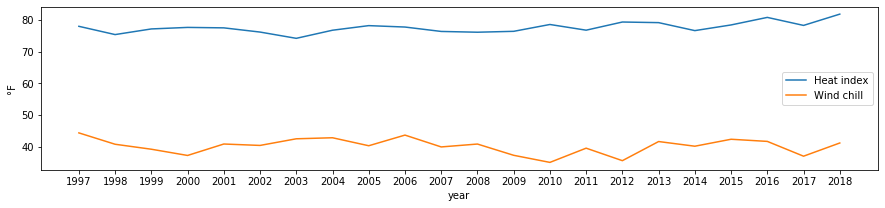

{'1997': 77.97540202689245, '1998': 75.36934667847966, '1999': 77.14898219546674, '2000': 77.63173901977402, '2001': 77.48934014178847, '2002': 76.16288220423286, '2003': 74.18460710811924, '2004': 76.7435197504572, '2005': 78.19239492575979, '2006': 77.746966619564, '2007': 76.35804161189988, '2008': 76.11400794676989, '2009': 76.3954388267617, '2010': 78.55194382075253, '2011': 76.75713303983773, '2012': 79.33056138937941, '2013': 79.13677316710549, '2014': 76.61928620560458, '2015': 78.40871984073614, '2016': 80.78793464160154, '2017': 78.26206135074558, '2018': 81.81803367230366}

{'1997': 44.36527364437285, '1998': 40.779446337005, '1999': 39.212103458113944, '2000': 37.246392943583906, '2001': 40.85533351983313, '2002': 40.40948816233256, '2003': 42.501422797387484, '2004': 42.82922393229953, '2005': 40.30890755145823, '2006': 43.669511729796504, '2007': 39.93470945407463, '2008': 40.84600446931118, '2009': 37.29639168728253, '2010': 35.060433088357726, '2011': 39.543978966056244

In [46]:
show_all(41)

Heat index & Wind chill at ./newdata/인제(211).csv

Relation: 47%


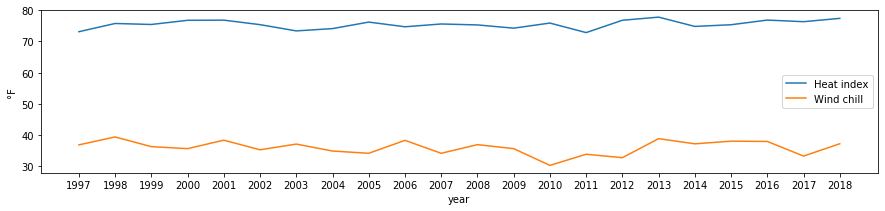

{'1997': 73.12727693969856, '1998': 75.7630709973063, '1999': 75.44374596548265, '2000': 76.78097017243589, '2001': 76.82837685589152, '2002': 75.39037404128626, '2003': 73.38639383596762, '2004': 74.12226375924455, '2005': 76.20841941601041, '2006': 74.70677790108638, '2007': 75.60156568068675, '2008': 75.2987331301975, '2009': 74.26496832965064, '2010': 75.8983495993488, '2011': 72.84331084354599, '2012': 76.79329332153158, '2013': 77.7955526799733, '2014': 74.81807766465901, '2015': 75.36254009197123, '2016': 76.84928991443742, '2017': 76.3367794819508, '2018': 77.40156532972566}

{'1997': 36.88535856161863, '1998': 39.4276444808692, '1999': 36.321744936251534, '2000': 35.68149812864106, '2001': 38.38693084832108, '2002': 35.3152577208358, '2003': 37.143494554374065, '2004': 34.91295218887283, '2005': 34.19429954563425, '2006': 38.33661304341628, '2007': 34.19325908287738, '2008': 36.96201029516151, '2009': 35.676949034914166, '2010': 30.3185079298218, '2011': 33.88916329218113, '20

In [47]:
show_all(42)

Heat index & Wind chill at ./newdata/홍천(212).csv

Relation: 42%


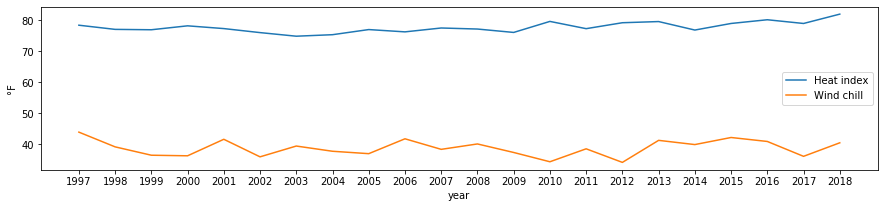

{'1997': 78.42772331654986, '1998': 77.08373174268135, '1999': 76.9616690965522, '2000': 78.22795429595399, '2001': 77.33964837254005, '2002': 76.04299478565274, '2003': 74.88222731249924, '2004': 75.3681546992643, '2005': 77.02241098278817, '2006': 76.28115759379747, '2007': 77.52875635036472, '2008': 77.19234169210476, '2009': 76.0970426921978, '2010': 79.65269940062734, '2011': 77.31310491726184, '2012': 79.22678528328379, '2013': 79.60337424570628, '2014': 76.86778888451985, '2015': 78.99029903853446, '2016': 80.18792143250708, '2017': 78.98724446458915, '2018': 81.99949435215697}

{'1997': 43.94732088368266, '1998': 39.198060457086186, '1999': 36.50164897142841, '2000': 36.31507443239314, '2001': 41.63861555186071, '2002': 35.979711526788336, '2003': 39.4615057077306, '2004': 37.779014989169724, '2005': 37.00249026001037, '2006': 41.798549380255196, '2007': 38.39641508265638, '2008': 40.13651798505352, '2009': 37.38676078154532, '2010': 34.392362002090834, '2011': 38.5681011439340

In [48]:
show_all(43)

Heat index & Wind chill at ./newdata/태백(216).csv

Relation: 52%


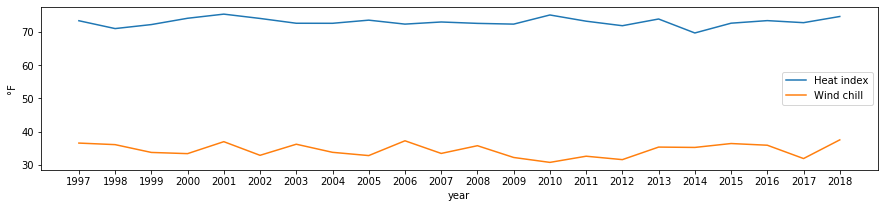

{'1997': 73.37972582858409, '1998': 71.01794372378217, '1999': 72.22451973036733, '2000': 74.11996097162559, '2001': 75.36508409335416, '2002': 74.06669281809395, '2003': 72.62027312181495, '2004': 72.60674967134536, '2005': 73.55304767321314, '2006': 72.36139367647715, '2007': 73.00103475720793, '2008': 72.58360856302795, '2009': 72.35891057146529, '2010': 75.11084669806706, '2011': 73.24101913411812, '2012': 71.87987005921809, '2013': 73.90071895728632, '2014': 69.69599021638722, '2015': 72.6398520325696, '2016': 73.41325253456998, '2017': 72.79648296787762, '2018': 74.65481451656586}

{'1997': 36.56322014360108, '1998': 36.09470604895646, '1999': 33.74675053941431, '2000': 33.386581542156776, '2001': 36.984744632208724, '2002': 32.87983612194749, '2003': 36.21848216312699, '2004': 33.781448691277866, '2005': 32.80054167211146, '2006': 37.25228584689171, '2007': 33.44564767443052, '2008': 35.77233844233196, '2009': 32.23002961502097, '2010': 30.751838887863236, '2011': 32.61027182750

In [49]:
show_all(44)

Heat index & Wind chill at ./newdata/제천(221).csv

Relation: 61%


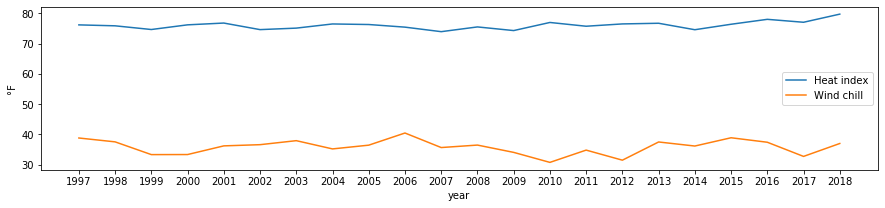

{'1997': 76.21536153978482, '1998': 75.90637758475565, '1999': 74.68505511510092, '2000': 76.22917674999677, '2001': 76.81936800106264, '2002': 74.65002269072917, '2003': 75.1435132932463, '2004': 76.520216600947, '2005': 76.33684467235848, '2006': 75.46803338101594, '2007': 73.9733926309496, '2008': 75.53982408419593, '2009': 74.33675488209813, '2010': 77.01306172051157, '2011': 75.76866421516073, '2012': 76.53270691172844, '2013': 76.75123533899101, '2014': 74.61517194665404, '2015': 76.42294804249904, '2016': 78.05022285966304, '2017': 77.0809883688695, '2018': 79.76850521911706}

{'1997': 38.82492611376637, '1998': 37.54807292817279, '1999': 33.33612821129882, '2000': 33.35710375436062, '2001': 36.22268996826828, '2002': 36.61920574970303, '2003': 37.94289183536616, '2004': 35.21780217913356, '2005': 36.456522240037486, '2006': 40.472609868336555, '2007': 35.66879859104761, '2008': 36.48605524842812, '2009': 34.07050937027181, '2010': 30.763835850412093, '2011': 34.8240133063302, '

In [50]:
show_all(45)

Heat index & Wind chill at ./newdata/보은(226).csv

Relation: 57%


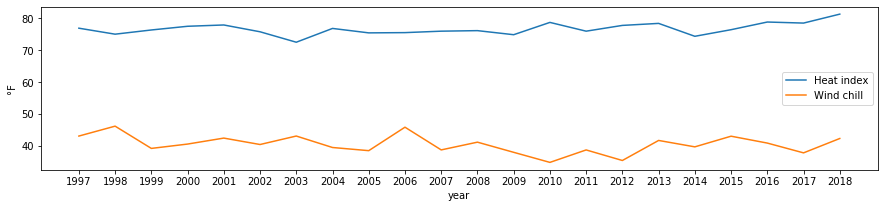

{'1997': 76.88039516121644, '1998': 75.00463542274191, '1999': 76.32143972567583, '2000': 77.48069421695723, '2001': 77.88868127617825, '2002': 75.75672774519356, '2003': 72.4847168562952, '2004': 76.80522285427801, '2005': 75.41453739332786, '2006': 75.49226399254967, '2007': 75.94530304529226, '2008': 76.11473061085061, '2009': 74.83838135019002, '2010': 78.69307539179798, '2011': 75.94606874796385, '2012': 77.75347659217162, '2013': 78.38433476827484, '2014': 74.34059095686469, '2015': 76.40955624128763, '2016': 78.81274201965563, '2017': 78.48405055005884, '2018': 81.28730692433437}

{'1997': 43.070978368898125, '1998': 46.17887969424262, '1999': 39.20185681221001, '2000': 40.5623544031179, '2001': 42.43554796717729, '2002': 40.42363494112333, '2003': 43.081379334521536, '2004': 39.48657925872907, '2005': 38.49664715871396, '2006': 45.849029605217495, '2007': 38.73253144087394, '2008': 41.160542796805956, '2009': 37.97547771098202, '2010': 34.82045359259705, '2011': 38.722694118276

In [51]:
show_all(46)

Heat index & Wind chill at ./newdata/천안(232).csv

Relation: 55%


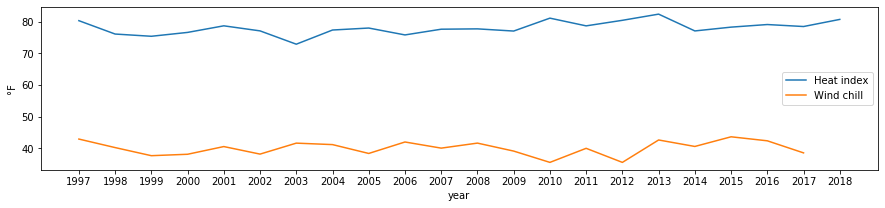

{'1997': 80.3267014984725, '1998': 76.10051825397821, '1999': 75.39284839113252, '2000': 76.61533895993935, '2001': 78.69937959401744, '2002': 77.09962544952923, '2003': 72.8898257642689, '2004': 77.37100509951193, '2005': 77.99769666834119, '2006': 75.81885124655801, '2007': 77.6279963884241, '2008': 77.73615901757522, '2009': 77.04544338745451, '2010': 81.12594875385679, '2011': 78.68518247082906, '2012': 80.43972719450119, '2013': 82.39481792069309, '2014': 77.08212326549958, '2015': 78.28415173289217, '2016': 79.10436981645041, '2017': 78.47751199589743, '2018': 80.72698429271279}

{'1997': 42.89078747617177, '1998': 40.19745403373353, '1999': 37.633878159614106, '2000': 38.082446904446336, '2001': 40.518828348863096, '2002': 38.13383807215525, '2003': 41.60205060496167, '2004': 41.139371965449364, '2005': 38.33941776885082, '2006': 41.964601454724544, '2007': 40.02341534206515, '2008': 41.611561059199005, '2009': 39.08944030596234, '2010': 35.516218352507344, '2011': 39.9633397432

In [52]:
show_all(47)

Heat index & Wind chill at ./newdata/보령(235).csv

Relation: 52%


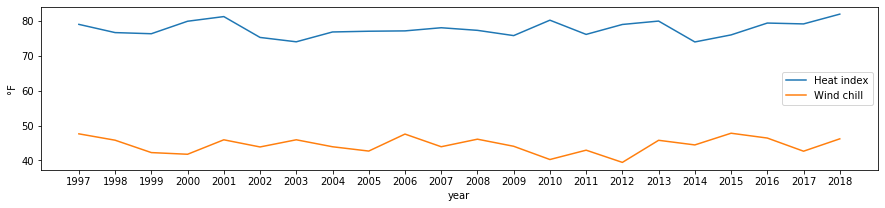

{'1997': 78.98283627965776, '1998': 76.62940670557857, '1999': 76.3031503415367, '2000': 79.88061090976852, '2001': 81.21394725410394, '2002': 75.24249343013472, '2003': 73.9915648796504, '2004': 76.80727959807491, '2005': 77.01876839663431, '2006': 77.11804968762623, '2007': 78.01919457502062, '2008': 77.27313696065181, '2009': 75.76774189560938, '2010': 80.18407251301225, '2011': 76.11105635531877, '2012': 78.95710543716461, '2013': 79.9286551710212, '2014': 73.95021012237163, '2015': 75.96804019534639, '2016': 79.36222943677858, '2017': 79.11434777284802, '2018': 81.91659705434832}

{'1997': 47.62750529701166, '1998': 45.8062047568454, '1999': 42.25916543984804, '2000': 41.77875395863879, '2001': 45.9214190682733, '2002': 43.87128019578381, '2003': 45.92558012786483, '2004': 43.93009483002022, '2005': 42.69369144972896, '2006': 47.56177441180816, '2007': 43.936089832168385, '2008': 46.098265747928735, '2009': 44.06553288461704, '2010': 40.272327531861954, '2011': 42.94955683450163, 

In [53]:
show_all(48)

In [54]:
# 부여(236) 는 기상청 데이터의 오류로 표본에서 제외했다.
# 2011-08-31 데이터가 소실되었다. (기온과 상대습도 값이 존재하지 않음)
# 해당값 : 236,2011-08-31,,.8,
# show_all(49)

Heat index & Wind chill at ./newdata/금산(238).csv

Relation: 52%


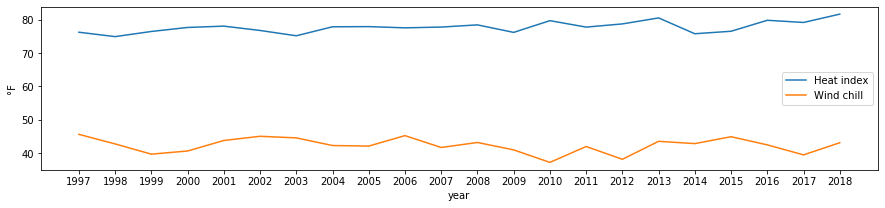

{'1997': 76.27371922144891, '1998': 74.95348233350232, '1999': 76.49920588062614, '2000': 77.70346877827707, '2001': 78.10117490064971, '2002': 76.8027260627441, '2003': 75.20845692955399, '2004': 77.90598198671489, '2005': 77.95670159077858, '2006': 77.5911003878221, '2007': 77.82083284048285, '2008': 78.47738673479274, '2009': 76.22181955120669, '2010': 79.74633335837298, '2011': 77.81067946278385, '2012': 78.7702833468381, '2013': 80.56377088476968, '2014': 75.81754432177824, '2015': 76.56488890176756, '2016': 79.85648665423922, '2017': 79.20528825376623, '2018': 81.7049290747419}

{'1997': 45.61810654162979, '1998': 42.739673868744816, '1999': 39.669876809478446, '2000': 40.61220867269056, '2001': 43.77095381606522, '2002': 45.03089258366597, '2003': 44.552307381597295, '2004': 42.259043092853204, '2005': 42.09144230992698, '2006': 45.232759779897535, '2007': 41.67288168594937, '2008': 43.17148523413739, '2009': 40.95117203772942, '2010': 37.195518461020015, '2011': 41.964590969924

In [55]:
show_all(50)

Heat index & Wind chill at ./newdata/부안(243).csv

Relation: 42%


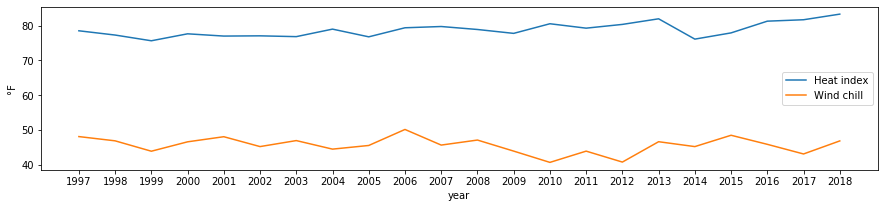

{'1997': 78.52612543607265, '1998': 77.2996217698856, '1999': 75.65041793309561, '2000': 77.65351900367212, '2001': 77.00444690991591, '2002': 77.07160398649809, '2003': 76.841574199304, '2004': 79.00555644145389, '2005': 76.78535965365205, '2006': 79.39345968039575, '2007': 79.75692946989217, '2008': 78.90083417887767, '2009': 77.7805118701978, '2010': 80.55380223889507, '2011': 79.28242478904757, '2012': 80.36407811991309, '2013': 81.97658554296432, '2014': 76.1265917140501, '2015': 77.92203165007318, '2016': 81.29707486335363, '2017': 81.70717400651952, '2018': 83.32292607691703}

{'1997': 48.05522245930712, '1998': 46.829969861783525, '1999': 43.83981588038383, '2000': 46.54448815681273, '2001': 48.01752740059758, '2002': 45.17484867365557, '2003': 46.901943423156595, '2004': 44.441680382987364, '2005': 45.4939301257322, '2006': 50.10757728440815, '2007': 45.608527553705976, '2008': 47.05601512236499, '2009': 43.87280775059485, '2010': 40.62242330500006, '2011': 43.86432974896418, 

In [56]:
show_all(51)

Heat index & Wind chill at ./newdata/임실(244).csv

Relation: 57%


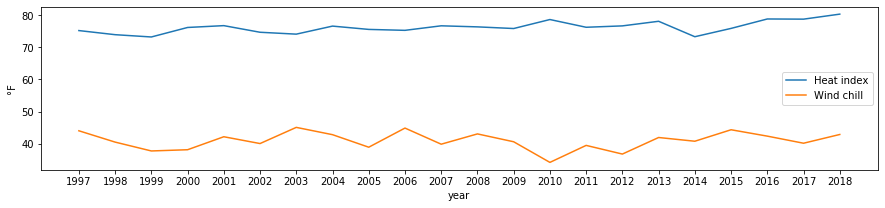

{'1997': 75.23693320990128, '1998': 73.95471873921431, '1999': 73.24019819441772, '2000': 76.20144113481128, '2001': 76.7743970652368, '2002': 74.71040328526325, '2003': 74.12259160656352, '2004': 76.6283793916955, '2005': 75.59739862537306, '2006': 75.30786002688612, '2007': 76.72069608546373, '2008': 76.3889430518878, '2009': 75.87495428766512, '2010': 78.67662185358313, '2011': 76.26559629045094, '2012': 76.69644126712723, '2013': 78.13156461318157, '2014': 73.31997175330503, '2015': 75.91213239295942, '2016': 78.84928811999494, '2017': 78.79567438769008, '2018': 80.35924267019207}

{'1997': 44.00497761017303, '1998': 40.47820336597162, '1999': 37.71735776926846, '2000': 38.099654477299694, '2001': 42.14749369511802, '2002': 40.02404368527603, '2003': 45.06497987192976, '2004': 42.792353555206866, '2005': 38.88527098269958, '2006': 44.85045911179713, '2007': 39.82603998440539, '2008': 43.03064314949557, '2009': 40.5818859038358, '2010': 34.15510802225796, '2011': 39.44971728685812, 

In [57]:
show_all(52)

Heat index & Wind chill at ./newdata/정읍(245).csv

Relation: 61%


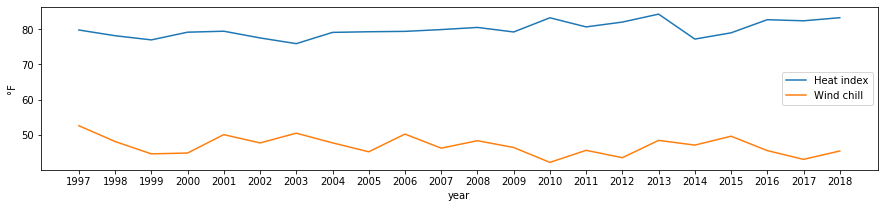

{'1997': 79.73346600288409, '1998': 78.1149036237661, '1999': 76.9317587981701, '2000': 79.1148754181905, '2001': 79.39040899707699, '2002': 77.4874696976103, '2003': 75.86772629090312, '2004': 79.05716796450018, '2005': 79.23903488602336, '2006': 79.34697115522376, '2007': 79.85284329699904, '2008': 80.46160145260555, '2009': 79.177687836456, '2010': 83.19459967686713, '2011': 80.61263458661712, '2012': 81.98182259968662, '2013': 84.23121361582335, '2014': 77.16294712428245, '2015': 78.93188734308973, '2016': 82.65395333885553, '2017': 82.34000066152318, '2018': 83.22001466082709}

{'1997': 52.61195093914093, '1998': 48.13187587148833, '1999': 44.63288074878855, '2000': 44.87174598746353, '2001': 50.08705722819623, '2002': 47.7326057852328, '2003': 50.49767447441146, '2004': 47.75692156982401, '2005': 45.22676280167576, '2006': 50.24514992341235, '2007': 46.24799968225482, '2008': 48.366522601269594, '2009': 46.44168340615721, '2010': 42.22071175997213, '2011': 45.63687662048797, '201

In [58]:
show_all(53)

Heat index & Wind chill at ./newdata/남원(247).csv

Relation: 42%


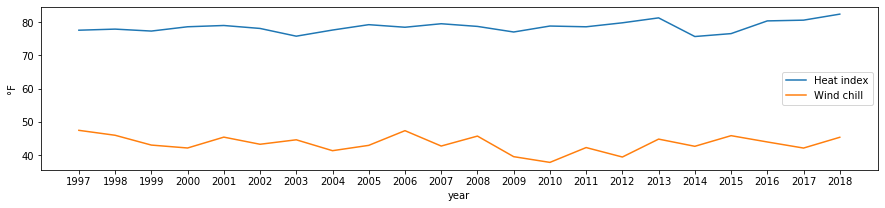

{'1997': 77.59236975568841, '1998': 77.92186270901473, '1999': 77.33519342130256, '2000': 78.62866967657831, '2001': 79.01171404851625, '2002': 78.12440205758931, '2003': 75.79384480911331, '2004': 77.64127440711889, '2005': 79.26111677705146, '2006': 78.48478950068515, '2007': 79.54175230848298, '2008': 78.73591025677533, '2009': 77.05261216270435, '2010': 78.84873998129886, '2011': 78.62240244866989, '2012': 79.82081236011385, '2013': 81.30763793880757, '2014': 75.68950047805309, '2015': 76.56932827541664, '2016': 80.39597167455837, '2017': 80.61994060061143, '2018': 82.4336321590768}

{'1997': 47.44156450081553, '1998': 45.9561039834221, '1999': 43.003413757568, '2000': 42.1236093081295, '2001': 45.39497923366265, '2002': 43.2467683403228, '2003': 44.59185490228917, '2004': 41.313097463606184, '2005': 42.91707546579787, '2006': 47.34179899617058, '2007': 42.712567749260316, '2008': 45.71013899062578, '2009': 39.51275393713033, '2010': 37.78957374918687, '2011': 42.253208818195404, '

In [59]:
show_all(54)

Heat index & Wind chill at ./newdata/장수(248).csv

Relation: 52%


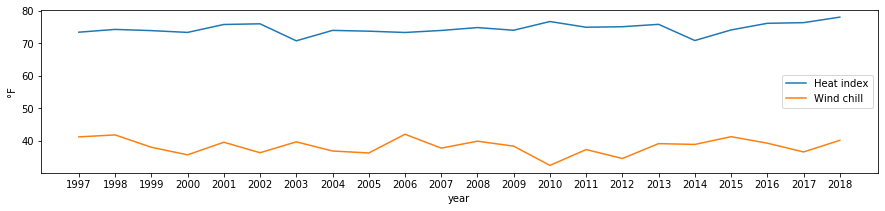

{'1997': 73.36951412864595, '1998': 74.22289543530823, '1999': 73.85415046172243, '2000': 73.29908266393659, '2001': 75.73863269050574, '2002': 75.94205157870815, '2003': 70.71875287772336, '2004': 73.92074989239588, '2005': 73.67852726718172, '2006': 73.27962011493712, '2007': 73.90035624159398, '2008': 74.78532115320496, '2009': 73.9628331913456, '2010': 76.64353785518757, '2011': 74.89078408328832, '2012': 75.05251550621186, '2013': 75.77765920749836, '2014': 70.80786876081332, '2015': 74.05688603254305, '2016': 76.0950342290355, '2017': 76.29754801128266, '2018': 77.99469516798021}

{'1997': 41.20240436450425, '1998': 41.81072728714324, '1999': 38.00562321761908, '2000': 35.684945405499505, '2001': 39.55745648370212, '2002': 36.33502323110492, '2003': 39.671776915579514, '2004': 36.86209196598463, '2005': 36.25399787095948, '2006': 42.0128170414052, '2007': 37.74612603188783, '2008': 39.878785063345326, '2009': 38.357666318794834, '2010': 32.44242242251948, '2011': 37.3045591053197

In [60]:
show_all(55)

Heat index & Wind chill at ./newdata/주암(256).csv

Relation: 57%


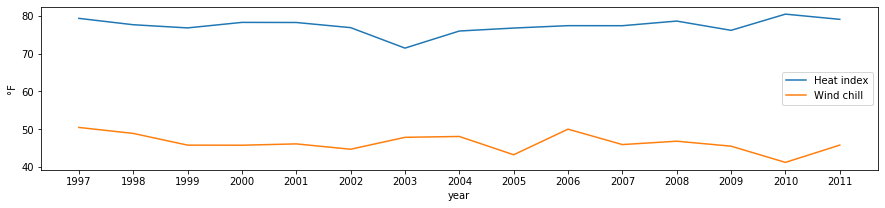

{'1997': 79.37004214712645, '1998': 77.6827051857376, '1999': 76.8398430076109, '2000': 78.30480723840081, '2001': 78.2776098593207, '2002': 76.91373038649252, '2003': 71.47931472022165, '2004': 76.0153958199841, '2005': 76.80290997140085, '2006': 77.43634248949071, '2007': 77.42563243447132, '2008': 78.65390097449036, '2009': 76.19506942269456, '2010': 80.49550768793702, '2011': 79.11204330585689}

{'1997': 50.43146374596457, '1998': 48.84658473611241, '1999': 45.736843154164546, '2000': 45.712018649544305, '2001': 46.06711926622651, '2002': 44.64487960957094, '2003': 47.809377012966365, '2004': 48.033824372425535, '2005': 43.185482006055956, '2006': 49.97730739889687, '2007': 45.88409216288464, '2008': 46.77913083951821, '2009': 45.464240948536826, '2010': 41.15804298947207, '2011': 45.74501128082734}


In [61]:
show_all(56)

In [62]:
# 장흥(260) 은 기상청 데이터의 오류로 표본에서 제외했다.
# 2015-03-31 데이터가 소실되었다. (상대습도 값이 존재하지 않음)
# 해당값 : 260,2015-03-31,13.9,1.7,
# show_all(57)

In [63]:
# 해남(261) 은 기상청 데이터의 오류로 표본에서 제외했다.
# 2015-08-31 데이터가 소실되었다. (기온 값이 존재하지 않음)
# 해당값 : 261,2015-08-31,,1.3,87.6
# show_all(58)

Heat index & Wind chill at ./newdata/고흥(262).csv

Relation: 52%


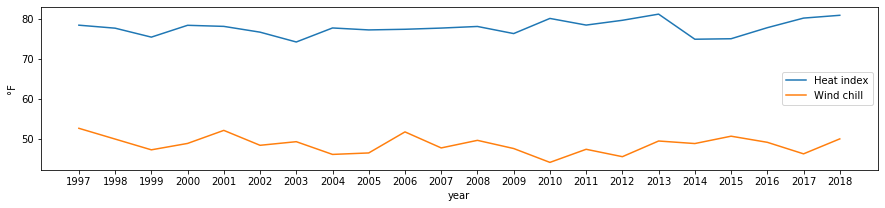

{'1997': 78.44988152606398, '1998': 77.70023555867674, '1999': 75.45593914049492, '2000': 78.4203077556888, '2001': 78.14886633701902, '2002': 76.70182787447617, '2003': 74.23915883918745, '2004': 77.75271998617049, '2005': 77.26188088869736, '2006': 77.42453700276478, '2007': 77.72456069646049, '2008': 78.12905488617312, '2009': 76.34764046256142, '2010': 80.1415073350421, '2011': 78.47491196750858, '2012': 79.67327289339525, '2013': 81.21749397885358, '2014': 74.93033275055595, '2015': 75.05278240222167, '2016': 77.82151112770448, '2017': 80.22401023249948, '2018': 80.92654908512654}

{'1997': 52.61718990865018, '1998': 49.921174146360975, '1999': 47.22271862991629, '2000': 48.82634165870552, '2001': 52.094796046928785, '2002': 48.35843728201516, '2003': 49.26404571333712, '2004': 46.07517774989675, '2005': 46.44353795854824, '2006': 51.71743273397532, '2007': 47.70080721493428, '2008': 49.599472821174686, '2009': 47.55015369706567, '2010': 44.07765114250807, '2011': 47.3589596116454

In [64]:
show_all(59)

Heat index & Wind chill at ./newdata/성산포(265).csv

Relation: 66%


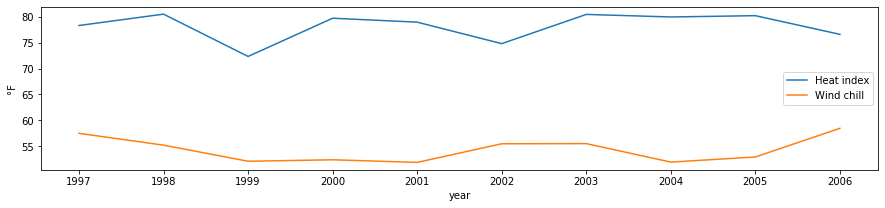

{'1997': 78.32812866219224, '1998': 80.52727238519387, '1999': 72.34293506917605, '2000': 79.73736343942805, '2001': 78.97682079683054, '2002': 74.82043211421902, '2003': 80.47242342107145, '2004': 79.9799453830382, '2005': 80.2308472124504, '2006': 76.61970439290143}

{'1997': 57.4753576260676, '1998': 55.192538212497496, '1999': 52.078354187264104, '2000': 52.36209040080497, '2001': 51.858180618455684, '2002': 55.45745195777809, '2003': 55.486856186788245, '2004': 51.91563562716146, '2005': 52.90202034010959, '2006': 58.44880502635541}


In [65]:
show_all(60)

Heat index & Wind chill at ./newdata/봉화(271).csv

Relation: 52%


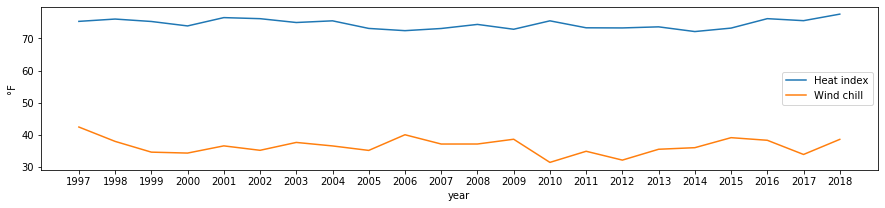

{'1997': 75.33589828898417, '1998': 76.05854120326998, '1999': 75.30144991185638, '2000': 73.91442411728372, '2001': 76.5079900735135, '2002': 76.17713634300917, '2003': 74.98041159154278, '2004': 75.50508065178427, '2005': 73.13720542391043, '2006': 72.4397663354086, '2007': 73.11543254414123, '2008': 74.3855744744561, '2009': 72.87684727212272, '2010': 75.50428364974383, '2011': 73.33248470914427, '2012': 73.29039878646445, '2013': 73.62945106828835, '2014': 72.15961001811328, '2015': 73.23977669063476, '2016': 76.18139366672379, '2017': 75.55365095437337, '2018': 77.5920642706198}

{'1997': 42.40222437245522, '1998': 37.92232951033864, '1999': 34.57222426266843, '2000': 34.281866573312335, '2001': 36.52494351623513, '2002': 35.141759755953956, '2003': 37.59843633023893, '2004': 36.5062774538837, '2005': 35.11028490489801, '2006': 39.993585081472254, '2007': 37.09948005109032, '2008': 37.10591926961325, '2009': 38.592842597723575, '2010': 31.377635151631583, '2011': 34.84370793239092

In [66]:
show_all(61)

Heat index & Wind chill at ./newdata/영주(272).csv

Relation: 47%


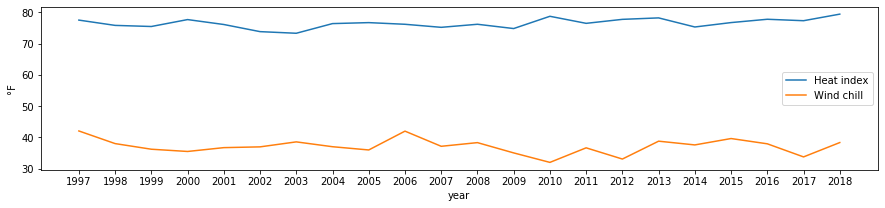

{'1997': 77.50212580854154, '1998': 75.81024618003426, '1999': 75.45410330550136, '2000': 77.6681303748958, '2001': 76.09397677964124, '2002': 73.81160133010191, '2003': 73.29101526211267, '2004': 76.38374746893489, '2005': 76.69569336795888, '2006': 76.16436410783808, '2007': 75.18842544763041, '2008': 76.16821347293602, '2009': 74.79832948059466, '2010': 78.72065860442956, '2011': 76.46574769453169, '2012': 77.74168469287052, '2013': 78.20814811512274, '2014': 75.29855340821452, '2015': 76.70857808883764, '2016': 77.76940989158027, '2017': 77.30682107263917, '2018': 79.41187977114991}

{'1997': 42.026143072075854, '1998': 37.984792919944844, '1999': 36.18389115444902, '2000': 35.46500994612443, '2001': 36.6901736941354, '2002': 36.93657159066263, '2003': 38.534188884373854, '2004': 36.98519927554138, '2005': 35.948038781246225, '2006': 41.970585915922754, '2007': 37.119259277075855, '2008': 38.295469506026585, '2009': 35.00496590380768, '2010': 31.970851158626438, '2011': 36.62798883

In [67]:
show_all(62)

Heat index & Wind chill at ./newdata/문경(273).csv

Relation: 52%


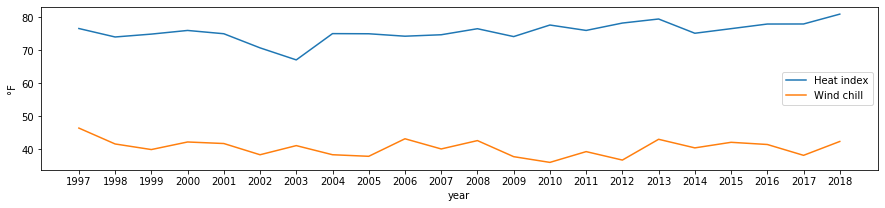

{'1997': 76.61250582517974, '1998': 74.04604018661983, '1999': 74.91951542012114, '2000': 76.02633041386635, '2001': 75.03046928049834, '2002': 70.7502247514113, '2003': 67.10244367085654, '2004': 75.0650813464335, '2005': 75.02189818910077, '2006': 74.28185066831675, '2007': 74.72246166962579, '2008': 76.5511356975094, '2009': 74.16701971789433, '2010': 77.6683017303581, '2011': 76.03250808630243, '2012': 78.26561550526495, '2013': 79.49380176679566, '2014': 75.17817862622098, '2015': 76.56679728903758, '2016': 77.9704281028669, '2017': 77.98584497950482, '2018': 80.96944292222584}

{'1997': 46.444941765073715, '1998': 41.632968897925416, '1999': 39.93884854111499, '2000': 42.23417312407899, '2001': 41.768195198393784, '2002': 38.36500408631573, '2003': 41.13309813435477, '2004': 38.37264422602154, '2005': 37.892871960868256, '2006': 43.208764877624894, '2007': 40.12203081166299, '2008': 42.65381879747537, '2009': 37.784267240510346, '2010': 36.051441226354285, '2011': 39.315714408847

In [68]:
show_all(63)

Heat index & Wind chill at ./newdata/영덕(277).csv

Relation: 38%


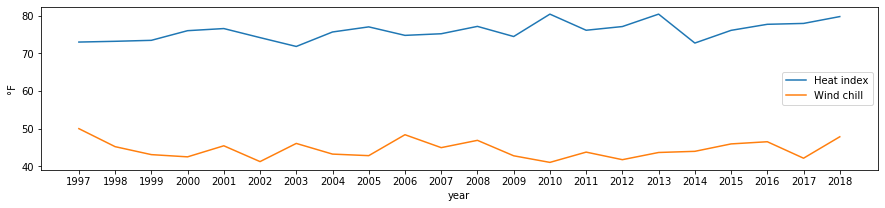

{'1997': 73.01665350714434, '1998': 73.21688387702112, '1999': 73.47532501986642, '2000': 76.04177610169701, '2001': 76.60743530175951, '2002': 74.19965620726505, '2003': 71.84646159713698, '2004': 75.69674370828311, '2005': 77.05496431290935, '2006': 74.79467616694157, '2007': 75.22673247832941, '2008': 77.1857386495293, '2009': 74.49020985036773, '2010': 80.443337593211, '2011': 76.15728915356476, '2012': 77.14149448169574, '2013': 80.44322364075992, '2014': 72.75246537947649, '2015': 76.13106525203538, '2016': 77.73839916175038, '2017': 77.97163055057743, '2018': 79.79282792666496}

{'1997': 49.99005788044613, '1998': 45.198744903759255, '1999': 43.08145178793119, '2000': 42.48858848096761, '2001': 45.43095963411655, '2002': 41.22493372824526, '2003': 46.05862722947814, '2004': 43.22053721475961, '2005': 42.80825896314599, '2006': 48.37492536130486, '2007': 44.938564431128974, '2008': 46.878907356411084, '2009': 42.771962565995786, '2010': 41.01589764021351, '2011': 43.7481018544440

In [69]:
show_all(64)

Heat index & Wind chill at ./newdata/의성(278).csv

Relation: 61%


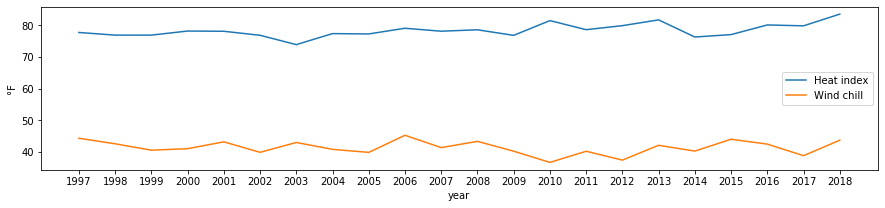

{'1997': 77.70283481877046, '1998': 76.86933757460167, '1999': 76.87064138491056, '2000': 78.15805601725435, '2001': 78.08212518770137, '2002': 76.8185359498292, '2003': 73.86885140248603, '2004': 77.34685202591555, '2005': 77.2390261858054, '2006': 79.03695279925837, '2007': 78.10394961858626, '2008': 78.551568178555, '2009': 76.79348038655132, '2010': 81.44976557070117, '2011': 78.58689190205062, '2012': 79.8544777413772, '2013': 81.677226816293, '2014': 76.27181073313191, '2015': 77.03298548616803, '2016': 80.08141666529669, '2017': 79.80121605138572, '2018': 83.49200294205237}

{'1997': 44.32784542829136, '1998': 42.579362388564476, '1999': 40.56180503918167, '2000': 41.043071876340186, '2001': 43.19345976612177, '2002': 39.885048722917325, '2003': 42.99616027903628, '2004': 40.824225016060474, '2005': 39.869038686546105, '2006': 45.266900276193894, '2007': 41.37620444696037, '2008': 43.34635322250085, '2009': 40.241711664544, '2010': 36.71160998166374, '2011': 40.22368918672794, '

In [70]:
show_all(65)

Heat index & Wind chill at ./newdata/구미(279).csv

Relation: 61%


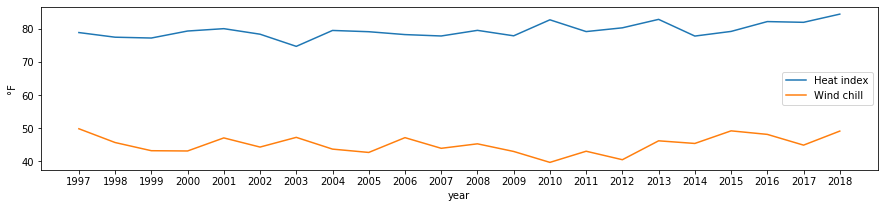

{'1997': 78.84160902404297, '1998': 77.44238992257064, '1999': 77.19379881344112, '2000': 79.30422214707905, '2001': 80.01591368996262, '2002': 78.34769343150609, '2003': 74.68096705383434, '2004': 79.47779761411823, '2005': 79.09652040317462, '2006': 78.23128712389834, '2007': 77.80833185660909, '2008': 79.50619251653073, '2009': 77.86226953888487, '2010': 82.68492186120356, '2011': 79.13814095308454, '2012': 80.26924885411067, '2013': 82.81816695210358, '2014': 77.78510597105766, '2015': 79.18467199133441, '2016': 82.1523096948888, '2017': 81.92812529157999, '2018': 84.39731602292117}

{'1997': 49.840047685079284, '1998': 45.68523533307006, '1999': 43.219987309103345, '2000': 43.138812091138156, '2001': 47.078822416692745, '2002': 44.31911608532731, '2003': 47.24548335985597, '2004': 43.701887180483105, '2005': 42.69789884942682, '2006': 47.158462090400945, '2007': 43.94270311786409, '2008': 45.2961970102603, '2009': 42.99365928540528, '2010': 39.698877786821086, '2011': 43.064033458

In [71]:
show_all(66)

Heat index & Wind chill at ./newdata/영천(281).csv

Relation: 52%


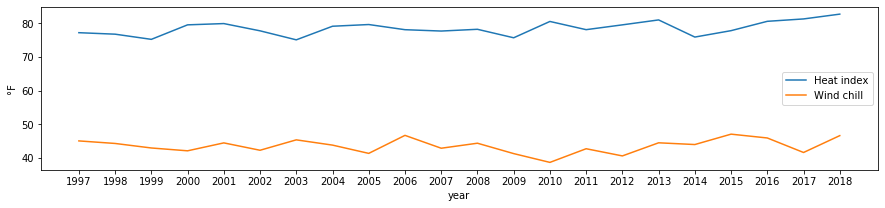

{'1997': 77.18265826672383, '1998': 76.73998604138066, '1999': 75.20149108154607, '2000': 79.51281458848149, '2001': 79.89072536997452, '2002': 77.73611733275453, '2003': 75.05640608504198, '2004': 79.09845682956171, '2005': 79.60649652705864, '2006': 78.07287530768484, '2007': 77.67093341144398, '2008': 78.192149754053, '2009': 75.67075417757586, '2010': 80.52035768748952, '2011': 78.08164366060937, '2012': 79.51190316516994, '2013': 80.97689020462002, '2014': 75.88306221949183, '2015': 77.7874494769946, '2016': 80.56231929445495, '2017': 81.27085123868025, '2018': 82.69769985628655}

{'1997': 45.01716646061577, '1998': 44.26101285182488, '1999': 42.9159816135561, '2000': 42.074185443676605, '2001': 44.43098358040857, '2002': 42.23877237320597, '2003': 45.3314995447248, '2004': 43.769561194187055, '2005': 41.311520915828865, '2006': 46.66514042805174, '2007': 42.84357779530936, '2008': 44.33376689821098, '2009': 41.24605640788521, '2010': 38.63429252810262, '2011': 42.692431724412174,

In [72]:
show_all(67)

In [73]:
# 거창(284) 는 기상청 데이터의 오류로 표본에서 제외했다.
# 2018-08-31 데이터가 소실되었다. (기온과 상대습도 값이 존재하지 않음)
# 해당값 : 284,2018-08-31,,1,
# show_all(68)

Heat index & Wind chill at ./newdata/합천(285).csv

Relation: 33%


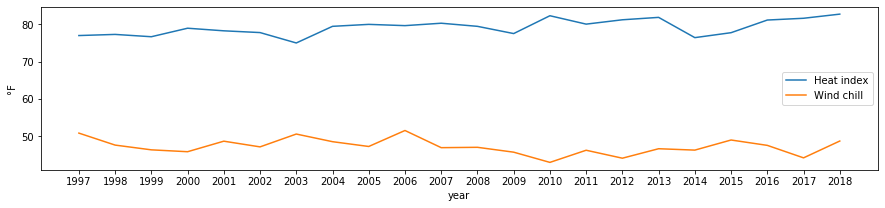

{'1997': 77.00259689972506, '1998': 77.30627238704824, '1999': 76.68483748138634, '2000': 78.96552116322219, '2001': 78.27092222881646, '2002': 77.7998081150297, '2003': 75.01227751042995, '2004': 79.47141609818584, '2005': 79.99646169221865, '2006': 79.65920002794813, '2007': 80.30490201581577, '2008': 79.47066612781327, '2009': 77.53235957112895, '2010': 82.31233575011461, '2011': 80.06248390309499, '2012': 81.2267109146315, '2013': 81.8735357147478, '2014': 76.44268512972712, '2015': 77.76932397576566, '2016': 81.1585227813468, '2017': 81.6330042117832, '2018': 82.74180947923472}

{'1997': 50.85459282205302, '1998': 47.64142986642393, '1999': 46.36868040161299, '2000': 45.86547605400598, '2001': 48.68985457936908, '2002': 47.1622455346954, '2003': 50.60168828600875, '2004': 48.555639356918434, '2005': 47.269331672628795, '2006': 51.55299314695981, '2007': 46.9501081333828, '2008': 47.047070540137675, '2009': 45.74234438122511, '2010': 43.00532107571068, '2011': 46.2605920382786, '20

In [74]:
show_all(69)

Heat index & Wind chill at ./newdata/밀양(288).csv

Relation: 52%


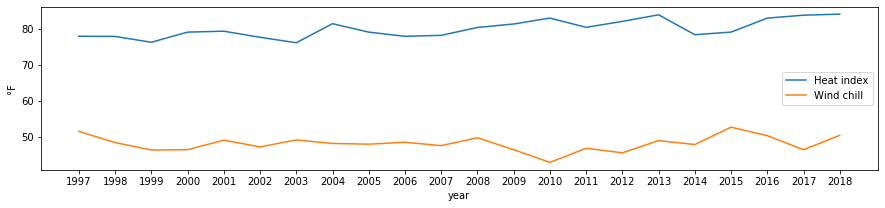

{'1997': 77.87454557756936, '1998': 77.82356384281188, '1999': 76.2091629486399, '2000': 79.01763285579291, '2001': 79.27601925091707, '2002': 77.58948562320482, '2003': 76.07360865572788, '2004': 81.35785144359032, '2005': 79.01733361982157, '2006': 77.85966524824056, '2007': 78.12743134761621, '2008': 80.30967371783812, '2009': 81.27301884317926, '2010': 82.90172075085715, '2011': 80.34497198977947, '2012': 81.98934456848667, '2013': 83.81479938226171, '2014': 78.30021825142491, '2015': 79.0308154817793, '2016': 82.90199344234797, '2017': 83.70711180547178, '2018': 84.00116712882331}

{'1997': 51.53262362244685, '1998': 48.41668872969358, '1999': 46.367510725583266, '2000': 46.447555591346855, '2001': 49.084999103250254, '2002': 47.227692198211706, '2003': 49.1508061038044, '2004': 48.185111255048334, '2005': 47.97695391211619, '2006': 48.51280471079719, '2007': 47.57493363916896, '2008': 49.751704114186516, '2009': 46.44026990241463, '2010': 42.933709317295495, '2011': 46.8481889509

In [75]:
show_all(70)

Heat index & Wind chill at ./newdata/산청(289).csv

Relation: 38%


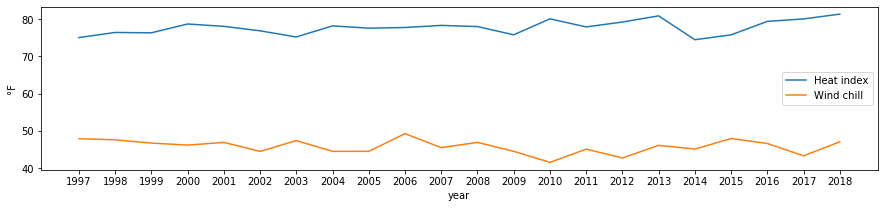

{'1997': 75.0552797691094, '1998': 76.42664427252204, '1999': 76.32821807770632, '2000': 78.69872537740099, '2001': 78.06229770349687, '2002': 76.87008232930201, '2003': 75.21267851585094, '2004': 78.19370773736686, '2005': 77.58217832115416, '2006': 77.75511700895615, '2007': 78.32035177780955, '2008': 78.0087363653796, '2009': 75.79523059603979, '2010': 80.07438149287354, '2011': 77.9135787942216, '2012': 79.22156597815798, '2013': 80.87811202867753, '2014': 74.47916916466102, '2015': 75.78252170982242, '2016': 79.40072624637551, '2017': 80.06060146662905, '2018': 81.34282071101948}

{'1997': 47.93231012434802, '1998': 47.617508255508454, '1999': 46.75381829141764, '2000': 46.208048427163355, '2001': 46.93230187284033, '2002': 44.51849872669769, '2003': 47.41148829529049, '2004': 44.5286220704699, '2005': 44.533883074316996, '2006': 49.27578276429, '2007': 45.53356883928196, '2008': 46.93398607889625, '2009': 44.541227104146, '2010': 41.56902639878865, '2011': 45.14054457156851, '201

In [76]:
show_all(71)

Heat index & Wind chill at ./newdata/거제(294).csv

Relation: 61%


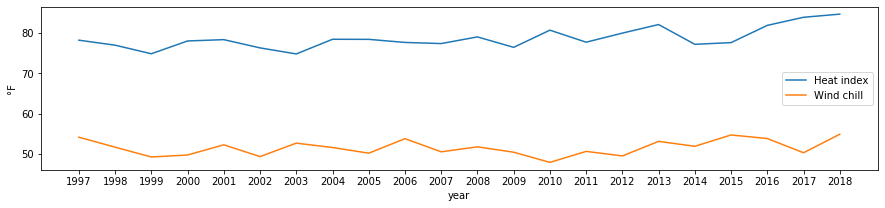

{'1997': 78.21404956919758, '1998': 76.97522178663709, '1999': 74.8482592375393, '2000': 78.02072664805144, '2001': 78.34660071028192, '2002': 76.30456965728347, '2003': 74.80211112576364, '2004': 78.4378829361473, '2005': 78.4195869369096, '2006': 77.6544071198464, '2007': 77.3741442934044, '2008': 79.02656010684986, '2009': 76.43661851936761, '2010': 80.69864753103296, '2011': 77.71348741808963, '2012': 79.96748125313742, '2013': 82.09126452105725, '2014': 77.19011629313421, '2015': 77.60909831804021, '2016': 81.88439533160854, '2017': 83.88993015134106, '2018': 84.67100167894364}

{'1997': 54.16121066530566, '1998': 51.69043836492006, '1999': 49.25964115825963, '2000': 49.7510850653361, '2001': 52.27914106049372, '2002': 49.36141958240665, '2003': 52.69328174663887, '2004': 51.60379412449455, '2005': 50.205459148726376, '2006': 53.79340798811308, '2007': 50.540001690558, '2008': 51.77455436749548, '2009': 50.44294657602955, '2010': 47.92066036784278, '2011': 50.65117645857879, '2012

In [77]:
show_all(72)

Heat index & Wind chill at ./newdata/동두천(98).csv

Relation: 40%


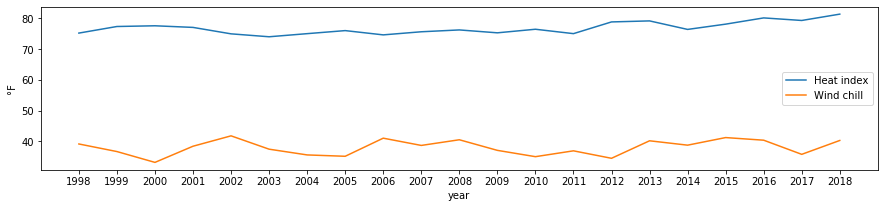

{'1998': 75.23877255212837, '1999': 77.38491020899417, '2000': 77.6182133693231, '2001': 77.08938524884562, '2002': 74.99385272907172, '2003': 74.04086871163267, '2004': 75.05479121991625, '2005': 76.04707276213217, '2006': 74.65682583883952, '2007': 75.66829334613753, '2008': 76.26698598366798, '2009': 75.32513462565845, '2010': 76.49005071625567, '2011': 75.06048279475998, '2012': 78.8742757564708, '2013': 79.20764672819492, '2014': 76.43512142579883, '2015': 78.15198664499073, '2016': 80.18297536584745, '2017': 79.34849163505436, '2018': 81.4123188949576}

{'1998': 39.12825153762338, '1999': 36.65754615102772, '2000': 33.13053244380923, '2001': 38.39201576830878, '2002': 41.77508458908154, '2003': 37.431320318173455, '2004': 35.560847495215185, '2005': 35.119066561482, '2006': 41.01728398797342, '2007': 38.653801981221875, '2008': 40.49959252134459, '2009': 37.048047741894095, '2010': 34.99124117604215, '2011': 36.8943709789214, '2012': 34.46187138965848, '2013': 40.16389983655868, 

In [78]:
show_all(73)

Heat index & Wind chill at ./newdata/백령도(102).csv

Relation: 41%


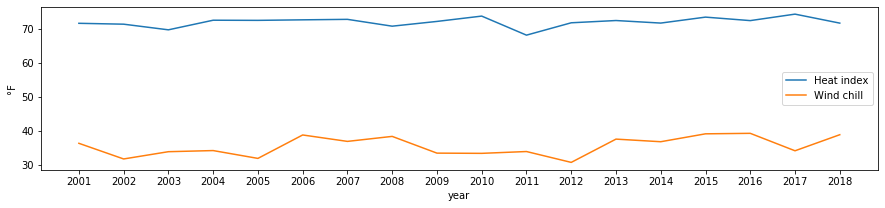

{'2001': 71.63454226160711, '2002': 71.37649321926122, '2003': 69.71795770308731, '2004': 72.54159949734522, '2005': 72.49958890845669, '2006': 72.655609441264, '2007': 72.79595158856897, '2008': 70.79054431288054, '2009': 72.18673650961462, '2010': 73.7531173709985, '2011': 68.15346890050188, '2012': 71.78635491237682, '2013': 72.45079202383397, '2014': 71.70104742206195, '2015': 73.45071645830426, '2016': 72.42745996677002, '2017': 74.32972996342605, '2018': 71.68719381225056}

{'2001': 36.37149616991301, '2002': 31.769626436960777, '2003': 33.90458739971484, '2004': 34.23520383977514, '2005': 31.934173945287785, '2006': 38.81954601981572, '2007': 36.93229915684009, '2008': 38.40125120314575, '2009': 33.48350294692815, '2010': 33.41891195657729, '2011': 33.953276843824604, '2012': 30.762809783523156, '2013': 37.60105992371353, '2014': 36.83525961708222, '2015': 39.15634975953843, '2016': 39.30113639732569, '2017': 34.17318433969735, '2018': 38.89533057476755}


In [79]:
show_all(74)

Heat index & Wind chill at ./newdata/파주(99).csv

Relation: 43%


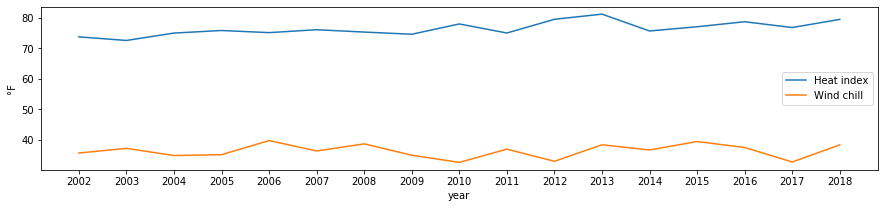

{'2002': 73.70638814630749, '2003': 72.52581937627198, '2004': 74.94609021134903, '2005': 75.7840030120818, '2006': 75.08583958323393, '2007': 76.03969552033013, '2008': 75.26967296996426, '2009': 74.56107582202685, '2010': 77.92205481734804, '2011': 74.96444458863294, '2012': 79.4471304238692, '2013': 81.13446879723475, '2014': 75.62541433602111, '2015': 77.0066595841, '2016': 78.64676078657817, '2017': 76.75041009901534, '2018': 79.41152175739474}

{'2002': 35.73008693526954, '2003': 37.25113970641384, '2004': 34.90816980258411, '2005': 35.18144160007252, '2006': 39.80200802413806, '2007': 36.402342420326825, '2008': 38.72344119400719, '2009': 35.009307114714936, '2010': 32.667420303217334, '2011': 36.99665363725067, '2012': 33.02352811102773, '2013': 38.41984222695722, '2014': 36.727454263045615, '2015': 39.490215144789325, '2016': 37.53413260830875, '2017': 32.80116130931018, '2018': 38.40431615743384}


In [80]:
show_all(75)

Heat index & Wind chill at ./newdata/상주(137).csv

Relation: 50%


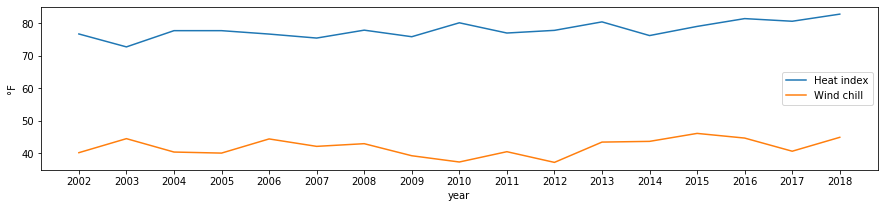

{'2002': 76.66897677855017, '2003': 72.68943035411742, '2004': 77.68593077037312, '2005': 77.68527528269729, '2006': 76.63759304205324, '2007': 75.4084996578078, '2008': 77.84112847938573, '2009': 75.82003339317315, '2010': 80.10620086939966, '2011': 76.95748673931824, '2012': 77.77882787827242, '2013': 80.38824384829623, '2014': 76.17681463073292, '2015': 78.99366684523032, '2016': 81.39534565986136, '2017': 80.58174892990371, '2018': 82.77315450766409}

{'2002': 40.12922082124717, '2003': 44.44780006254344, '2004': 40.32387785042291, '2005': 40.001701851349225, '2006': 44.361752775551416, '2007': 42.07260284136116, '2008': 42.89828296619817, '2009': 39.18676993886099, '2010': 37.25985370284304, '2011': 40.43256104018338, '2012': 37.14101665184169, '2013': 43.38816985452145, '2014': 43.609452182970294, '2015': 46.06231064326418, '2016': 44.6263249325491, '2017': 40.5796012034635, '2018': 44.85844201353239}


In [81]:
show_all(76)

Heat index & Wind chill at ./newdata/진도(정찰산)(175).csv

Relation: 50%


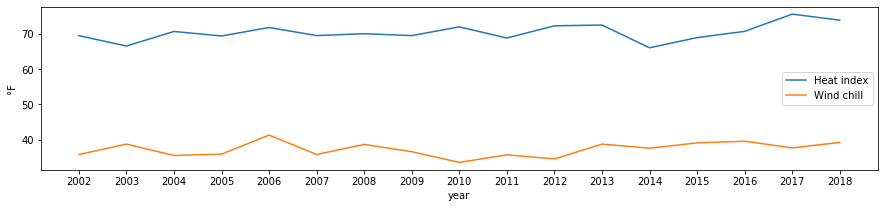

{'2002': 69.48036777122134, '2003': 66.5400475749867, '2004': 70.66994196917834, '2005': 69.38443324881204, '2006': 71.78767704562098, '2007': 69.49760853232159, '2008': 70.02304971774755, '2009': 69.49334635427914, '2010': 71.96704079831431, '2011': 68.81043487801676, '2012': 72.26593620700103, '2013': 72.47840983069582, '2014': 66.04071351058224, '2015': 68.92833819612021, '2016': 70.69521019743644, '2017': 75.57521523439146, '2018': 73.86829945154251}

{'2002': 35.81151561424546, '2003': 38.75525460354887, '2004': 35.53691782667227, '2005': 35.9109282929033, '2006': 41.31092855092079, '2007': 35.81806980748384, '2008': 38.66170795750037, '2009': 36.598217533945494, '2010': 33.57655142263677, '2011': 35.71591728444877, '2012': 34.558037259006284, '2013': 38.75060937511625, '2014': 37.599286019846616, '2015': 39.10047382542806, '2016': 39.577157485302884, '2017': 37.67584646143108, '2018': 39.2369482939735}


In [82]:
show_all(77)

Heat index & Wind chill at ./newdata/고창군(251).csv

Relation: 40%


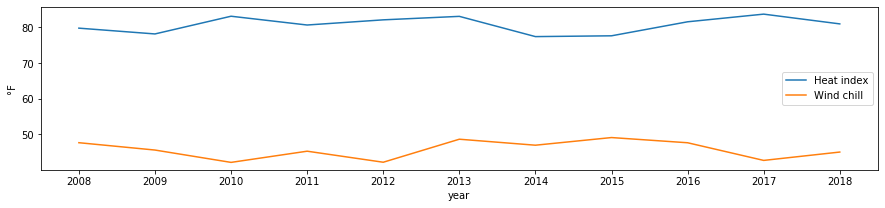

{'2008': 79.80761010034973, '2009': 78.1808530227205, '2010': 83.15812061727566, '2011': 80.690065776552, '2012': 82.14200550321601, '2013': 83.12154725752879, '2014': 77.43252194328883, '2015': 77.65685680414836, '2016': 81.5946127624339, '2017': 83.74685302202762, '2018': 81.00431371859231}

{'2008': 47.62076629205175, '2009': 45.55655301124718, '2010': 42.08889243129419, '2011': 45.23425460929173, '2012': 42.131508531762584, '2013': 48.60037069720463, '2014': 46.917442582710166, '2015': 49.065287390420224, '2016': 47.60508976279088, '2017': 42.64491402191735, '2018': 44.99219488485366}


In [83]:
show_all(78)

Heat index & Wind chill at ./newdata/북강릉(104).csv

Relation: 33%


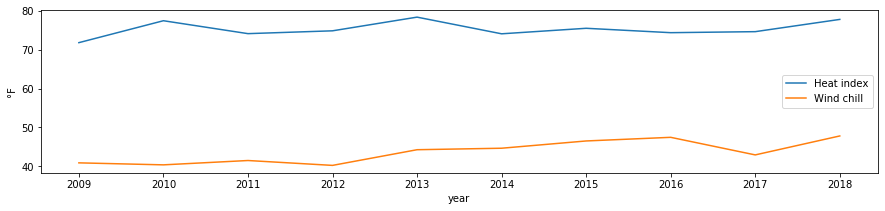

{'2009': 71.82344216453782, '2010': 77.46920857754222, '2011': 74.14287083229446, '2012': 74.87100526057296, '2013': 78.39464229131177, '2014': 74.10178455916984, '2015': 75.522898535667, '2016': 74.39257951402871, '2017': 74.65398861020365, '2018': 77.80896855757126}

{'2009': 40.87464624590224, '2010': 40.36041518547222, '2011': 41.47665219363674, '2012': 40.222276635530484, '2013': 44.25714757908596, '2014': 44.64086899362401, '2015': 46.51083057517331, '2016': 47.44788859366254, '2017': 42.92124716540854, '2018': 47.80103299412091}


In [84]:
show_all(79)

Heat index & Wind chill at ./newdata/영광군(252).csv

Relation: 50%


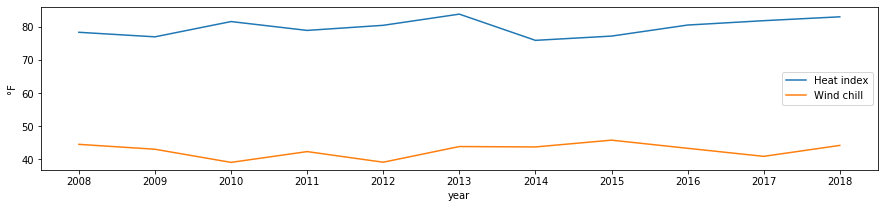

{'2008': 78.32592683396118, '2009': 76.95804943323206, '2010': 81.55909765986208, '2011': 78.8922678821165, '2012': 80.42829012452447, '2013': 83.7970796384254, '2014': 75.89656444079753, '2015': 77.18046030883305, '2016': 80.50702060577387, '2017': 81.8241084323858, '2018': 82.99086410473294}

{'2008': 44.56158281858135, '2009': 43.086074342442984, '2010': 39.12524149482241, '2011': 42.376353557141776, '2012': 39.17674636923825, '2013': 43.89705478707514, '2014': 43.77865041392683, '2015': 45.82368812641616, '2016': 43.3720599824729, '2017': 40.942181220511564, '2018': 44.24070943311423}


In [85]:
show_all(80)

Heat index & Wind chill at ./newdata/김해시(253).csv

Relation: 40%


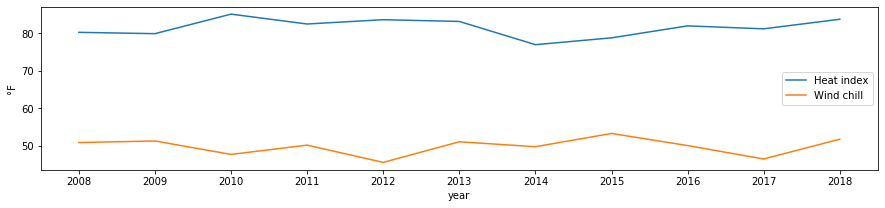

{'2008': 80.2475349768887, '2009': 79.90097212906164, '2010': 85.10093624996024, '2011': 82.47284029056084, '2012': 83.61929420679836, '2013': 83.14967936263389, '2014': 76.96543440681207, '2015': 78.78264191387451, '2016': 81.97657479973968, '2017': 81.18610500963219, '2018': 83.73844366835935}

{'2008': 50.89532505445939, '2009': 51.31814696391159, '2010': 47.738556823402725, '2011': 50.210984539620696, '2012': 45.61243584109588, '2013': 51.10258395546348, '2014': 49.78698939845825, '2015': 53.32131466091672, '2016': 50.08831768307514, '2017': 46.5201805639968, '2018': 51.79465519621747}


In [86]:
show_all(81)

Heat index & Wind chill at ./newdata/순창군(254).csv

Relation: 44%


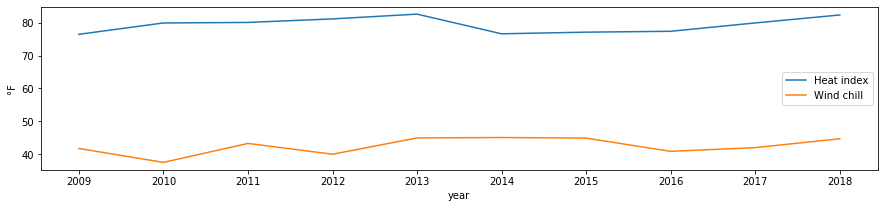

{'2009': 76.50866967734082, '2010': 79.96642084053563, '2011': 80.12677431389811, '2012': 81.20400859656253, '2013': 82.65828580112125, '2014': 76.66342952067643, '2015': 77.16270054716782, '2016': 77.42750397508024, '2017': 79.97719832658869, '2018': 82.40186096683067}

{'2009': 41.710335716066446, '2010': 37.469049249650354, '2011': 43.24820820016408, '2012': 39.9600069090973, '2013': 44.92323683535203, '2014': 45.05424900433675, '2015': 44.86916103139855, '2016': 40.829991016285675, '2017': 41.96891178428347, '2018': 44.675047832040356}


In [87]:
show_all(82)

In [88]:
# 북창원(255) 는 기상청 데이터의 오류로 표본에서 제외했다.
# 2018-08-31 데이터가 소실되었다. (상대습도 값이 존재하지 않음)
# 해당값 : 255,2012-03-31,9.3,3.1,
# show_all(83)

Heat index & Wind chill at ./newdata/양산시(257).csv

Relation: 44%


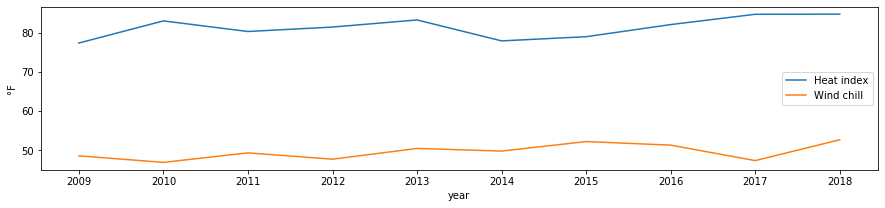

{'2009': 77.36781160727182, '2010': 83.02428896369997, '2011': 80.31390130940069, '2012': 81.45019831084912, '2013': 83.26611574168994, '2014': 77.91419542890937, '2015': 78.98620882571291, '2016': 82.08156583894781, '2017': 84.7134612036781, '2018': 84.75399307897052}

{'2009': 48.526637363290334, '2010': 46.85191291944867, '2011': 49.28432354542387, '2012': 47.67029584528315, '2013': 50.41771910372833, '2014': 49.744202373963965, '2015': 52.17556783914679, '2016': 51.26171798601435, '2017': 47.309695095098604, '2018': 52.63807641287415}


In [89]:
show_all(84)

Heat index & Wind chill at ./newdata/강진군(259).csv

Relation: 62%


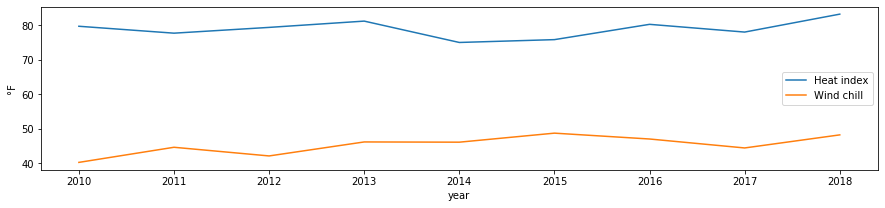

{'2010': 79.77091933681768, '2011': 77.76323230677949, '2012': 79.44135422921667, '2013': 81.2692104760893, '2014': 75.05973960158613, '2015': 75.88404387723732, '2016': 80.3309265078484, '2017': 78.081805365282, '2018': 83.29832379396687}

{'2010': 40.19052636226791, '2011': 44.585010301611725, '2012': 42.06627889242684, '2013': 46.13526815985713, '2014': 46.06716502821032, '2015': 48.69211835472928, '2016': 46.98984075997609, '2017': 44.388257703477585, '2018': 48.19013564554315}


In [90]:
show_all(85)

Heat index & Wind chill at ./newdata/고창(172).csv

Relation: 28%


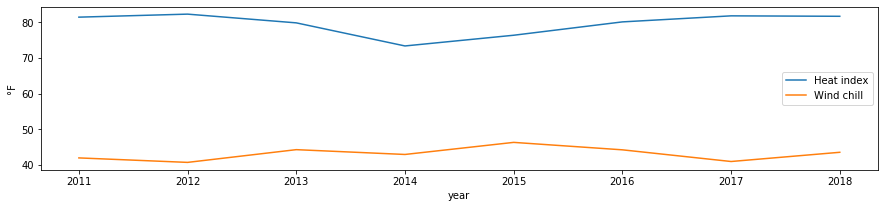

{'2011': 81.4014239335542, '2012': 82.24824809602256, '2013': 79.80325783447122, '2014': 73.33563939984393, '2015': 76.33521182478327, '2016': 80.07485073702516, '2017': 81.76784392975712, '2018': 81.64360003386302}

{'2011': 41.97266901847552, '2012': 40.71872699832836, '2013': 44.28562226739792, '2014': 42.93871585461622, '2015': 46.32270545529761, '2016': 44.23740763080375, '2017': 40.9659300357096, '2018': 43.54692804951003}


In [91]:
show_all(86)

Heat index & Wind chill at ./newdata/정선군(217).csv

Relation: 71%


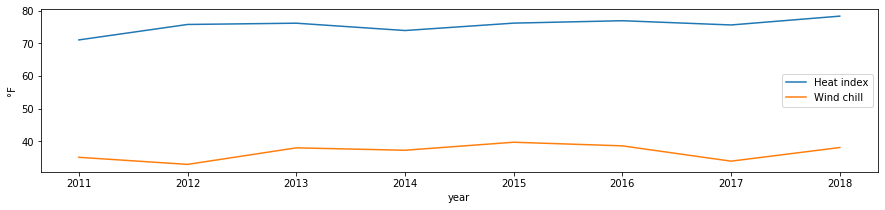

{'2011': 71.03898103515185, '2012': 75.7726956631721, '2013': 76.16296492290273, '2014': 73.91559353426501, '2015': 76.18463699281362, '2016': 76.91957006252044, '2017': 75.6218918938647, '2018': 78.3289564224943}

{'2011': 35.04495256471966, '2012': 32.873412255450766, '2013': 37.94424608979113, '2014': 37.20856664655109, '2015': 39.66834329508459, '2016': 38.55385316706873, '2017': 33.86081898048549, '2018': 38.042196537373776}


In [92]:
show_all(87)

Heat index & Wind chill at ./newdata/보성군(258).csv

Relation: 50%


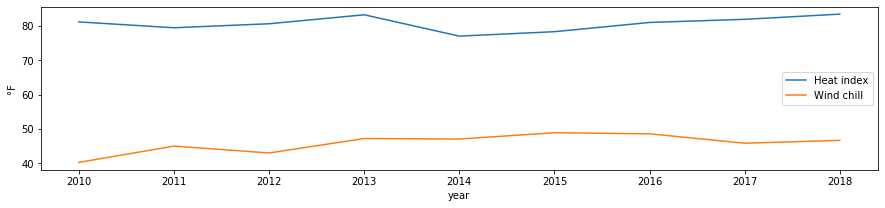

{'2010': 81.13816952440332, '2011': 79.43755360708111, '2012': 80.6020261957335, '2013': 83.20949157858497, '2014': 77.00910558508279, '2015': 78.29554731027442, '2016': 80.97712131582783, '2017': 81.89104614340661, '2018': 83.39771538223776}

{'2010': 40.297619016872204, '2011': 45.037629875637656, '2012': 43.035192926667314, '2013': 47.238104673695176, '2014': 47.096165669845774, '2015': 48.91028560496293, '2016': 48.602165397394394, '2017': 45.87394071745369, '2018': 46.696457896651}


In [93]:
show_all(88)

Heat index & Wind chill at ./newdata/의령군(263).csv

Relation: 42%


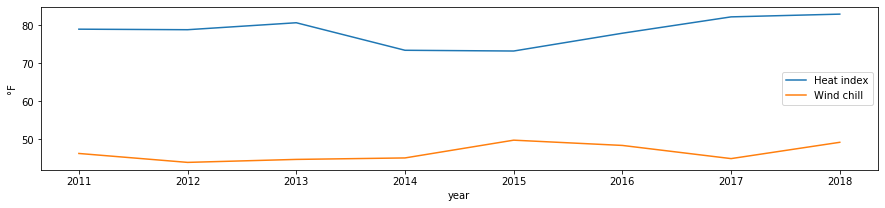

{'2011': 78.91436371525, '2012': 78.77464002071743, '2013': 80.60183470270037, '2014': 73.37981087040087, '2015': 73.18439330800419, '2016': 77.85447415903074, '2017': 82.1420333904057, '2018': 82.86180631594628}

{'2011': 46.307382827429414, '2012': 43.9656554440382, '2013': 44.74630189652127, '2014': 45.133156935301734, '2015': 49.794435995309826, '2016': 48.414333270770136, '2017': 44.957929337273775, '2018': 49.23667934022942}


In [94]:
show_all(89)

Heat index & Wind chill at ./newdata/함양군(264).csv

Relation: 57%


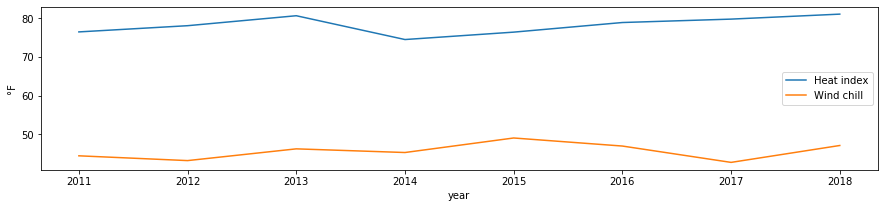

{'2011': 76.42788121136579, '2012': 78.0286228526395, '2013': 80.59845780788395, '2014': 74.46090219861821, '2015': 76.36940185465872, '2016': 78.84773640709042, '2017': 79.72562400447741, '2018': 81.01045220258503}

{'2011': 44.48128324979699, '2012': 43.247096352640284, '2013': 46.27518896891157, '2014': 45.331588349917666, '2015': 49.076362014127085, '2016': 46.99874021966528, '2017': 42.7861300569025, '2018': 47.142404221516294}


In [95]:
show_all(90)

Heat index & Wind chill at ./newdata/청송군(276).csv

Relation: 42%


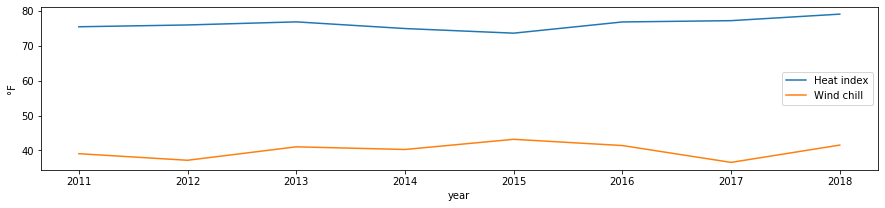

{'2011': 75.47264105349629, '2012': 75.9905430401854, '2013': 76.87588555189095, '2014': 74.96313208930684, '2015': 73.63612696816519, '2016': 76.85233442790089, '2017': 77.22546652146022, '2018': 79.09667348812484}

{'2011': 39.057749943017086, '2012': 37.172702457175326, '2013': 41.02906192688553, '2014': 40.26652521474391, '2015': 43.188245688754215, '2016': 41.3967110986908, '2017': 36.56516481888462, '2018': 41.528607732503644}


In [96]:
show_all(91)

Heat index & Wind chill at ./newdata/경주시(283).csv

Relation: 71%


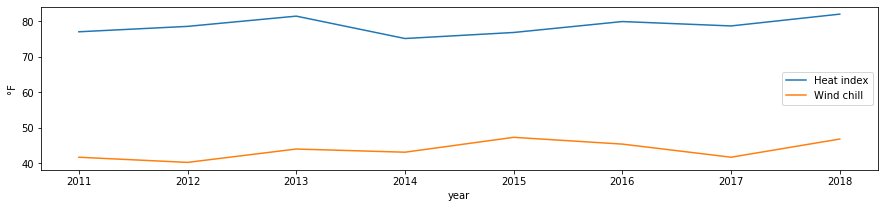

{'2011': 77.01152497474818, '2012': 78.53190125889998, '2013': 81.41431263696313, '2014': 75.11672017201833, '2015': 76.81474093009804, '2016': 79.88944232591466, '2017': 78.65664965329469, '2018': 81.97688392545308}

{'2011': 41.71162065908443, '2012': 40.264653676624334, '2013': 44.02546039223155, '2014': 43.13007803835006, '2015': 47.31544325368308, '2016': 45.40828875314471, '2017': 41.71918458562524, '2018': 46.83410853896968}


In [97]:
show_all(92)

Heat index & Wind chill at ./newdata/순천(174).csv

Relation: 71%


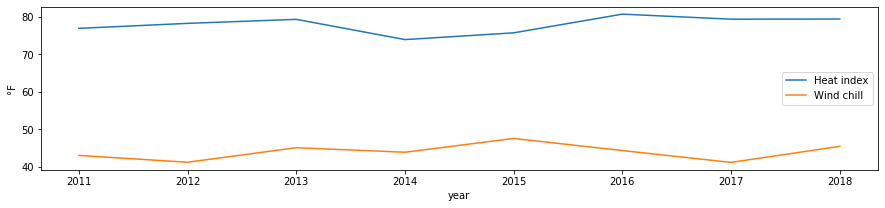

{'2011': 76.87103682972759, '2012': 78.19637537934373, '2013': 79.27008419111212, '2014': 73.87435047225928, '2015': 75.67432386273063, '2016': 80.66147376720079, '2017': 79.31317696406201, '2018': 79.3584231942941}

{'2011': 42.985399795966316, '2012': 41.173154315148004, '2013': 45.04381747838074, '2014': 43.837794808397014, '2015': 47.50714568863155, '2016': 44.28457342162133, '2017': 41.12922067462182, '2018': 45.40899615794624}


In [98]:
show_all(93)

Heat index & Wind chill at ./newdata/광양시(266).csv

Relation: 85%


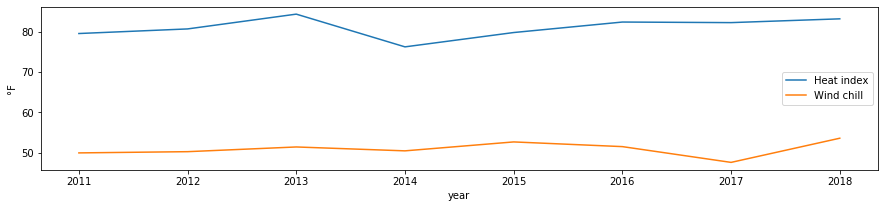

{'2011': 79.51092079669968, '2012': 80.6493493370709, '2013': 84.3082384961566, '2014': 76.21123676514675, '2015': 79.75570329866946, '2016': 82.35166650532668, '2017': 82.20930257629695, '2018': 83.14462129796244}

{'2011': 49.97953229943692, '2012': 50.28258271642993, '2013': 51.4471297483765, '2014': 50.48574888003852, '2015': 52.694418737124494, '2016': 51.53369659102554, '2017': 47.63204100255565, '2018': 53.6114827523504}


In [99]:
show_all(94)

In [100]:
# 대구(기)(176) 는 데이터가 너무 적어서 표본에서 제외했다.
# 2014년에서 2015년 사이의 1년밖에 데이터가 존재하지 않는다.
# show_all(95)

Heat index & Wind chill at ./newdata/진도군(268).csv

Relation: 75%


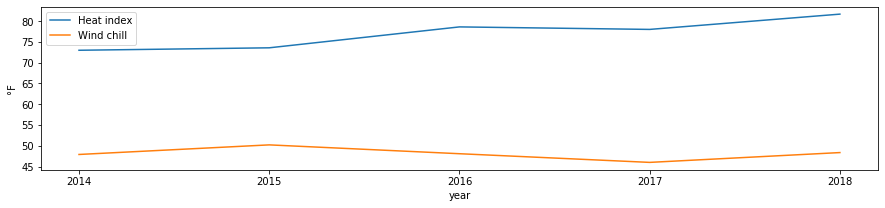

{'2014': 72.99316391054612, '2015': 73.58455412314473, '2016': 78.61739813500485, '2017': 78.01362296905424, '2018': 81.69111869954068}

{'2014': 47.909169031428696, '2015': 50.21764749356116, '2016': 48.089898803821946, '2017': 46.002739227967986, '2018': 48.36575948033095}


In [101]:
show_all(96)

Heat index & Wind chill at ./newdata/홍성(177).csv

Relation: 100%


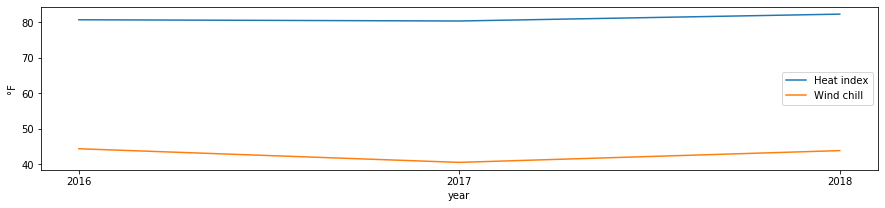

{'2016': 80.63994822758347, '2017': 80.29007309974222, '2018': 82.22050039529572}

{'2016': 44.390154083273984, '2017': 40.557991056775144, '2018': 43.867329841727}


In [102]:
show_all(97)

Heat index & Wind chill at ./newdata/북춘천(93).csv

Relation: 100%


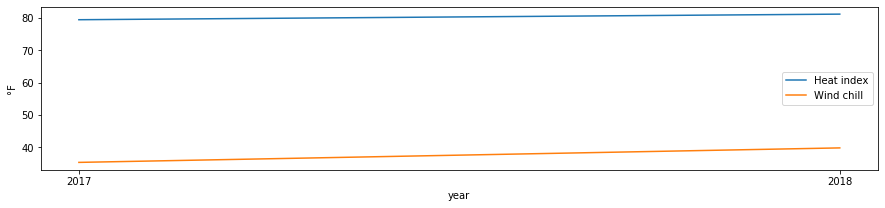

{'2017': 79.45927683193062, '2018': 81.18833721360377}

{'2017': 35.33643274337608, '2018': 39.81675711417159}


In [103]:
show_all(98)

## 6. 결론

총 99 개의 지점별 데이터 중 오류가 있는 6개를 제외한 나머지의 연관성 평균은 약 52% 이다.

따라서 다음과 같다.

여름에 사람이 느끼는 온도가 더 높아졌다고 해서 그 해 겨울에 사람이 느끼는 온도가 더 추워지는 것은 아니다. 둘 사이에는 인과관계적인 연관성이 존재하지 않는다.

이 결론이 가지고 있는 문제에는 다음과 같다.

기상청 데이터에 오류가 많다. 대부분의 오류는 부분적인 값 손실이다. 특정 값이 입력되지 않은 경우인데, 이를 예외로 처리하기는 하지만 너무 많아서 결론에 영향을 미칠 정도이다.

둘째는 결론을 내리는 과정에 있어서 오류가 있다. 두가지인데 하나는 상대적인 연관성을 사용한다는 것이고, 나머지는 사람이 느끼는 온도를 기준으로 한다는 것이다. 그래서 절대적인 수치해석과 거리감이 있다.

## 7. 참고문헌

> 위의 작업을 위하여 획득한 자료, 인터넷 정보, 논문, 도서 등을 나열함

(1) 열지수: https://www.weather.go.kr/weather/lifenindustry/li_asset/HELP/basic/help_01_04.jsp

(2) 체감온도: https://www.weather.go.kr/weather/lifenindustry/li_asset/HELP/basic/help_01_07.jsp

(3) 기상자료개방포털: https://data.kma.go.kr/cmmn/main.do



## 8. 별첨

분석에 사용한 원본 데이터는 다음과 같다.

[1997.csv](./data/1997.csv)
[1998.csv](./data/1998.csv)
[1999.csv](./data/1999.csv)
[2000.csv](./data/2000.csv)
[2001.csv](./data/2001.csv)
[2002.csv](./data/2002.csv)
[2003.csv](./data/2003.csv)
[2004.csv](./data/2004.csv)
[2005.csv](./data/2005.csv)
[2006.csv](./data/2006.csv)
[2007.csv](./data/2007.csv)
[2008.csv](./data/2008.csv)
[2009.csv](./data/2009.csv)
[2010.csv](./data/2010.csv)
[2011.csv](./data/2011.csv)
[2012.csv](./data/2012.csv)
[2013.csv](./data/2013.csv)
[2014.csv](./data/2014.csv)
[2015.csv](./data/2015.csv)
[2016.csv](./data/2016.csv)
[2017.csv](./data/2017.csv)
[2018.csv](./data/2018.csv)
[2019.csv](./data/2019.csv)

## 9. 별첨


*(4)* 에 의해 가공된 데이터는 다음과 같다.

[속초(90).csv](./newdata/속초(90).csv)
[철원(95).csv](./newdata/철원(95).csv)
[대관령(100).csv](./newdata/대관령(100).csv)
[춘천(101).csv](./newdata/춘천(101).csv)
[강릉(105).csv](./newdata/강릉(105).csv)
[동해(106).csv](./newdata/동해(106).csv)
[서울(108).csv](./newdata/서울(108).csv)
[인천(112).csv](./newdata/인천(112).csv)
[원주(114).csv](./newdata/원주(114).csv)
[울릉도(115).csv](./newdata/울릉도(115).csv)
[수원(119).csv](./newdata/수원(119).csv)
[영월(121).csv](./newdata/영월(121).csv)
[충주(127).csv](./newdata/충주(127).csv)
[서산(129).csv](./newdata/서산(129).csv)
[울진(130).csv](./newdata/울진(130).csv)
[청주(131).csv](./newdata/청주(131).csv)
[대전(133).csv](./newdata/대전(133).csv)
[추풍령(135).csv](./newdata/추풍령(135).csv)
[안동(136).csv](./newdata/안동(136).csv)
[포항(138).csv](./newdata/포항(138).csv)
[군산(140).csv](./newdata/군산(140).csv)
[대구(143).csv](./newdata/대구(143).csv)
[전주(146).csv](./newdata/전주(146).csv)
[울산(152).csv](./newdata/울산(152).csv)
[창원(155).csv](./newdata/창원(155).csv)
[광주(156).csv](./newdata/광주(156).csv)
[부산(159).csv](./newdata/부산(159).csv)
[통영(162).csv](./newdata/통영(162).csv)
[무안(164).csv](./newdata/무안(164).csv)
[목포(165).csv](./newdata/목포(165).csv)
[여수(168).csv](./newdata/여수(168).csv)
[흑산도(169).csv](./newdata/흑산도(169).csv)
[완도(170).csv](./newdata/완도(170).csv)
[제주(184).csv](./newdata/제주(184).csv)
[고산(185).csv](./newdata/고산(185).csv)
[성산(187).csv](./newdata/성산(187).csv)
[성산(188).csv](./newdata/성산(188).csv)
[서귀포(189).csv](./newdata/서귀포(189).csv)
[진주(192).csv](./newdata/진주(192).csv)
[강화(201).csv](./newdata/강화(201).csv)
[양평(202).csv](./newdata/양평(202).csv)
[이천(203).csv](./newdata/이천(203).csv)
[인제(211).csv](./newdata/인제(211).csv)
[홍천(212).csv](./newdata/홍천(212).csv)
[태백(216).csv](./newdata/태백(216).csv)
[제천(221).csv](./newdata/제천(221).csv)
[보은(226).csv](./newdata/보은(226).csv)
[천안(232).csv](./newdata/천안(232).csv)
[보령(235).csv](./newdata/보령(235).csv)
[부여(236).csv](./newdata/부여(236).csv)
[금산(238).csv](./newdata/금산(238).csv)
[부안(243).csv](./newdata/부안(243).csv)
[임실(244).csv](./newdata/임실(244).csv)
[정읍(245).csv](./newdata/정읍(245).csv)
[남원(247).csv](./newdata/남원(247).csv)
[장수(248).csv](./newdata/장수(248).csv)
[주암(256).csv](./newdata/주암(256).csv)
[장흥(260).csv](./newdata/장흥(260).csv)
[해남(261).csv](./newdata/해남(261).csv)
[고흥(262).csv](./newdata/고흥(262).csv)
[성산포(265).csv](./newdata/성산포(265).csv)
[봉화(271).csv](./newdata/봉화(271).csv)
[영주(272).csv](./newdata/영주(272).csv)
[문경(273).csv](./newdata/문경(273).csv)
[영덕(277).csv](./newdata/영덕(277).csv)
[의성(278).csv](./newdata/의성(278).csv)
[구미(279).csv](./newdata/구미(279).csv)
[영천(281).csv](./newdata/영천(281).csv)
[거창(284).csv](./newdata/거창(284).csv)
[합천(285).csv](./newdata/합천(285).csv)
[밀양(288).csv](./newdata/밀양(288).csv)
[산청(289).csv](./newdata/산청(289).csv)
[거제(294).csv](./newdata/거제(294).csv)
[동두천(98).csv](./newdata/동두천(98).csv)
[백령도(102).csv](./newdata/백령도(102).csv)
[파주(99).csv](./newdata/파주(99).csv)
[상주(137).csv](./newdata/상주(137).csv)
[진도(정찰산)(175).csv](./newdata/진도(정찰산)(175).csv)
[고창군(251).csv](./newdata/고창군(251).csv)
[북강릉(104).csv](./newdata/북강릉(104).csv)
[영광군(252).csv](./newdata/영광군(252).csv)
[김해시(253).csv](./newdata/김해시(253).csv)
[순창군(254).csv](./newdata/순창군(254).csv)
[북창원(255).csv](./newdata/북창원(255).csv)
[양산시(257).csv](./newdata/양산시(257).csv)
[강진군(259).csv](./newdata/강진군(259).csv)
[고창(172).csv](./newdata/고창(172).csv)
[정선군(217).csv](./newdata/정선군(217).csv)
[보성군(258).csv](./newdata/보성군(258).csv)
[의령군(263).csv](./newdata/의령군(263).csv)
[함양군(264).csv](./newdata/함양군(264).csv)
[청송군(276).csv](./newdata/청송군(276).csv)
[경주시(283).csv](./newdata/경주시(283).csv)
[순천(174).csv](./newdata/순천(174).csv)
[광양시(266).csv](./newdata/광양시(266).csv)
[대구(기)(176).csv](./newdata/대구(기)(176).csv)
[진도군(268).csv](./newdata/진도군(268).csv)
[홍성(177).csv](./newdata/홍성(177).csv)
[북춘천(93).csv](./newdata/북춘천(93).csv)


## 10. 별첨

*(4)* 코드 원본

데이터 가공을 위한 함수 코드

*주의* 순서대로 수행할 것

In [104]:
# functions for code

#########################
# run this script first #
#########################

# encoding mode
_encoding = 'unicode_escape' # for MAC OS
# _encoding = 'utf-8' # for windows

# read and manipulate csv files
def read_and_manipulate(_year, _placelist):
    # open csv file
        filename = "./data/" + str(_year) + ".csv"
        file = open(filename,  'r', encoding=_encoding)
        # erase first line
        lines = file.readline()
        # read all lines
        lines = file.readlines()
        # flags for control
        buffer = ""
        flag = ""
        # read a line
        for line in lines:
            sentence = line.split(',')
            place = sentence[0]
            # if place still
            if flag == place:
                buffer += line
            # else place change
            else:
                if flag in placelist.keys():
                    _placelist[flag] += buffer
                else:
                    _placelist[flag] = buffer
                flag = place
                buffer = line
        # close file
        file.close()

# make csv files with placelist
def make_csv(_placelist):
    for key in _placelist.keys():
        # delete unused key
        if key == '':
            continue
        else:
            filename = "./newdata/" + placeset[key] + '(' + key + ").csv"
            file = open(filename, 'w')
            # write csv
            file.write(placelist[key])
            # close file
            file.close()
            
# skip scv until the first january 1st comes
def skip_csv(_placelist):
    for key in _placelist.keys():
        # delete unused key
        if key == '':
            continue
            
        # open csv files
        filename = "./newdata/" + placeset[key] + '(' + key + ").csv"
        file = open(filename, 'r', encoding=_encoding)
        # skip until the 1st january comes
        buffer = ""
        flag = False
        lines = file.readlines()
        for line in lines:
            # if the first january 1st already comes
            if flag == True:
                buffer += line
                continue
            info = line.split(',')
            # if the first June 1st comes
            if '-06-01' in info[1]:
                buffer += line
                flag = True
                continue
            # else continue
        file.close()
        
        # write at file
        filename = "./newdata/" + placeset[key] + '(' + key + ").csv"
        file = open(filename, 'w')
        # write csv
        file.write(buffer)
        # close file
        file.close()

데이터 가공을 위한 코드

In [105]:
# make original data to newdata
# sort by place contained all from start year to end year

# dictionary for place code set
placeset = {
            # 서울특별시 
            '116':'관악산', '108':'서울',
            # 부산광역시
            '159':'부산',
            # 대구광역시
            '143':'대구', '176':'대구(기)',
            # 인천광역시
            '201':'강화', '102':'백령도', '112':'인천',
            # 광주광역시
            '156':'광주',
            # 대전광역시
            '133':'대전',
            # 울산광역시
            '152':'울산',
            # 경기도
            '98':'동두천', '119':'수원', '202':'양평', '203':'이천', '99':'파주',
            # 강원도
            '105':'강릉', '100':'대관령', '106':'동해', '104':'북강릉',
            '93':'북춘천', '214':'삼척', '90':'속초', '121':'영월',
            '114':'원주', '211':'인제','217':'정선군', '95':'철원',
            '101':'춘천', '216':'태백', '212':'홍천',
            # 충청북도
            '226':'보은', '221':'제천', '131':'청주', '135':'추풍령', '127':'충주',
            # 충청남도
            '238':'금산', '235':'보령', '236':'부여',
            '129':'서산', '232':'천안', '177':'홍성',
            # 전라북도
            '172':'고창', '251':'고창군', '140':'군산',
            '247':'남원', '243':'부안', '254':'순창군', '244':'임실',
            '248':'장수', '146':'전주', '245':'정읍',
            # 전라남도
            '259':'강진군', '262':'고흥', '266':'광양시',
            '165':'목포', '164':'무안', '258':'보성군', '174':'순천', 
            '168':'여수', '252':'영광군', '170':'완도', '260':'장흥',
            '256':'주암', '175':'진도(정찰산)', '268':'진도군', '261':'해남',
            '169':'흑산도',
            # 경상북도
            '283':'경주시', '279':'구미', '273':'문경',
            '271':'봉화', '137':'상주', '136':'안동', '277':'영덕',
            '272':'영주', '281':'영천', '115':'울릉도', '130':'울진',
            '278':'의성', '276':'청송군', '138':'포항',
            # 경상남도
            '294':'거제', '284':'거창',
            '253':'김해시', '295':'남해', '288':'밀양', '255':'북창원',
            '289':'산청', '257':'양산시', '263':'의령군', '192':'진주',
            '155':'창원', '162':'통영', '264':'함양군', '285':'합천',
            # 제주도
            '185':'고산', '189':'서귀포', '188':'성산',
            '187':'성산', '265':'성산포', '184':'제주'
           }

# master dictationary to manipulate all csv files {'지점':[...], '90':[...] ...}
placelist = {}
# year information
startYear = 1997
endYear = 2019
# read and manipulate all csv files
for year in range(startYear, endYear + 1):
        read_and_manipulate(year, placelist)
    
# make new csv files according to place name
make_csv(placelist)

# skip until the first january 1st comes
skip_csv(placelist)

데이터 처리를 위한 코드

*주의* 순서대로 수행할 것

In [106]:
# class for making the result
# check the version python 3.6 (for popitem)

###########################
#  RUN THIS SCRIPT FIRST  #
###########################

class ResultMaker:
    # __init__ method
    def __init__(self, file):
        self.file = file
        self.summerset = {}
        self.winterset= {}
    
    # __str__ method
    # print result set
    def __str__(self):
        rep = "{}\n\n{}".format(self.summerset, self.winterset)
        return rep
    
    # return the summerset
    def summerset_keys(self):
        return list(self.summerset.keys())
    def summerset_values(self):
        return list(self.summerset.values())
    
    # return the winterset
    def winterset_keys(self):
        return list(self.winterset.keys())
    def winterset_values(self):
        return list(self.winterset.values())
    
    # calculate process
    def calculate(self):
        summer = True
        hi = 0.0
        wc = 0.0
        # error-correction
        error = 0
        # read all lines
        lines = self.file.readlines()
        for line in lines:
            # get celsius degree from line
            info = line.split(',')
            date = info[1]
            
            # skip unused date (April to May, September to August)
            if ('-04-' in date or '-05-' in date):
                # get ready for summer
                summer = True
                continue
            if ('-09-' in date or '-10-' in date):
                # get ready for winter
                summer = False
                continue
                
            # catch errors on data (some human mistakes... such as no data)
            try:
                celsius = float(info[2]) # celsius
                wind = float(info[3]) # m/s
                humid = float(info[4]) # %
            except:
                error += 1
                continue
            
            # calculate summer (June to August)
            if summer:
                hi += self.heat_index(celsius, humid)
                # if summer ends
                if '-08-31' in date:
                    # add the result at lists
                    year = date[0:4]
                    self.summerset[year] = hi / (92 - error)
                    # reset hi
                    hi = 0.0
                    # reset index
                    error = 0
            
            # calculate Winter (November to March)
            elif not summer:
                wc += self.wind_chill(celsius, wind)
                # if winter ends
                if '-03-31' in date:
                    # add the result at lists
                    year = date[0:4]
                    preyear = str(int(year) - 1)
                    # if leap year (윤년)
                    if self.leap_year(int(year)):
                        self.winterset[preyear] = wc / (122 - error)
                    # if not leap year (윤년 X)
                    else:
                        self.winterset[preyear] = wc / (121 - error)
                    # reset wc
                    wc = 0.0
                    # reset index
                    error = 0
                    
    # fix the length of the sets
    # make same
    def fix(self):
        if len(self.summerset) > len(self.winterset):
            self.summerset.popitem()
        elif len(self.summerset) < len(self.winterset):
            self.winterset.popitem()
                
    # calculate heat index
    # HI = (-42.379 + (2.04901523 * F) + (10.14333127 * R) – (0.22475541 * F * R) – (0.00683770 * F * F)
    # – (0.05481717 * R * R) + (0.00122874 * F * F * R) + (0.00085282 * F * R * R) – (0.00000199 * F * F * R * R))
    def heat_index(self, C, R):
        F = self.celsius_to_fahrenheit(C)
        HI = (-42.379 + (2.04901523 * F) + (10.14333127 * R) - (0.22475541 * F * R) - (0.00683770 * F * F) - \
              (0.05481717 * R * R) + (0.00122874 * F * F * R) + (0.00085282 * F * R * R) - (0.00000199 * F * F * R * R))
        return HI
    
    # calculate wind chill
    # WC = 35.74 + (0.6215 * F) - (35.75 * (V ** 0.16)) + (0.4275 * F * (V ** 0.16))
    def wind_chill(self, C, ms):
        F = self.celsius_to_fahrenheit(C)
        V = self.meter_to_miles(ms)
        WC = 35.74 + (0.6215 * F) - (35.75 * (V ** 0.16)) + (0.4275 * F * (V ** 0.16))
        return WC
    
    # convert celsius to fahrenheit
    # (0°C × 9/5) + 32 = 32°F
    def celsius_to_fahrenheit(self, C):
        F = 1.8 * C + 32.0
        return F
    
    # convert fahrenheit to celsius
    def fahrenheit_to_celsius(self, F):
        C = (F - 32.0) / 1.8
        return C
    
    # convert meter/seconds to miles/hour
    def meter_to_miles(self, ms):
        mph = ms * 2.237
        return mph
    
    # check the leap year
    # if leap year return true, else return false
    def leap_year(self, year):
        if year % 400 == 0:
            return True
        elif year % 100 == 0:
            return False
        elif year % 4 == 0:
            return True
        else:
            return False

데이터 가공을 위한 코드

In [107]:
# functions for printing all results

filenames = [
'./newdata/속초(90).csv','./newdata/철원(95).csv','./newdata/대관령(100).csv','./newdata/춘천(101).csv',
'./newdata/강릉(105).csv','./newdata/동해(106).csv','./newdata/서울(108).csv','./newdata/인천(112).csv',
'./newdata/원주(114).csv','./newdata/울릉도(115).csv','./newdata/수원(119).csv','./newdata/영월(121).csv',
'./newdata/충주(127).csv','./newdata/서산(129).csv','./newdata/울진(130).csv','./newdata/청주(131).csv',
'./newdata/대전(133).csv','./newdata/추풍령(135).csv','./newdata/안동(136).csv','./newdata/포항(138).csv',
'./newdata/군산(140).csv','./newdata/대구(143).csv','./newdata/전주(146).csv','./newdata/울산(152).csv',
'./newdata/창원(155).csv','./newdata/광주(156).csv','./newdata/부산(159).csv','./newdata/통영(162).csv',
'./newdata/무안(164).csv','./newdata/목포(165).csv','./newdata/여수(168).csv','./newdata/흑산도(169).csv',
'./newdata/완도(170).csv','./newdata/제주(184).csv','./newdata/고산(185).csv','./newdata/성산(187).csv',
'./newdata/성산(188).csv','./newdata/서귀포(189).csv','./newdata/진주(192).csv','./newdata/강화(201).csv',
'./newdata/양평(202).csv','./newdata/이천(203).csv','./newdata/인제(211).csv','./newdata/홍천(212).csv',
'./newdata/태백(216).csv','./newdata/제천(221).csv','./newdata/보은(226).csv','./newdata/천안(232).csv',
'./newdata/보령(235).csv','./newdata/부여(236).csv','./newdata/금산(238).csv','./newdata/부안(243).csv',
'./newdata/임실(244).csv','./newdata/정읍(245).csv','./newdata/남원(247).csv','./newdata/장수(248).csv',
'./newdata/주암(256).csv','./newdata/장흥(260).csv','./newdata/해남(261).csv','./newdata/고흥(262).csv',
'./newdata/성산포(265).csv','./newdata/봉화(271).csv','./newdata/영주(272).csv','./newdata/문경(273).csv',
'./newdata/영덕(277).csv','./newdata/의성(278).csv','./newdata/구미(279).csv','./newdata/영천(281).csv',
'./newdata/거창(284).csv','./newdata/합천(285).csv','./newdata/밀양(288).csv','./newdata/산청(289).csv',
'./newdata/거제(294).csv','./newdata/동두천(98).csv','./newdata/백령도(102).csv','./newdata/파주(99).csv',
'./newdata/상주(137).csv','./newdata/진도(정찰산)(175).csv','./newdata/고창군(251).csv','./newdata/북강릉(104).csv',
'./newdata/영광군(252).csv','./newdata/김해시(253).csv','./newdata/순창군(254).csv','./newdata/북창원(255).csv',
'./newdata/양산시(257).csv','./newdata/강진군(259).csv','./newdata/고창(172).csv','./newdata/정선군(217).csv',
'./newdata/보성군(258).csv','./newdata/의령군(263).csv','./newdata/함양군(264).csv','./newdata/청송군(276).csv',
'./newdata/경주시(283).csv','./newdata/순천(174).csv','./newdata/광양시(266).csv','./newdata/대구(기)(176).csv',
'./newdata/진도군(268).csv','./newdata/홍성(177).csv','./newdata/북춘천(93).csv',
]

from matplotlib import pyplot as plt

# encoding mode
_encoding = 'unicode_escape' # for MAC OS
# _encoding = 'utf-8' # for windows

def show_all(index):
    filename=filenames[index]
    # open file
    file = open(filename, 'r', encoding=_encoding)
    maker = ResultMaker(file)
    maker.calculate()
    maker.fix()
    print("Heat index & Wind chill at " + filename + '\n')
    # set summer and winter variables
    summerkeys = maker.summerset_keys()
    summervalues = maker.summerset_values()
    winterkeys = maker.winterset_keys()
    wintervalues = maker.winterset_values()
    # get the precision
    print("Relation: {}%".format(get_precision(summervalues, wintervalues)))
    # draw graph
    draw_graph(summerkeys, summervalues, winterkeys, wintervalues)
    # print matrix
    print(maker)
    # close file
    file.close()
    
# draw graph
def draw_graph(_summerkeys, _summervalues, _winterkeys, _wintervalues):
    plt.figure(figsize=(15, 3))
    plt.xlabel('year')
    plt.ylabel('°F')
    plt.plot(_summerkeys, _summervalues)
    plt.plot(_winterkeys, _wintervalues)
    plt.legend(['Heat index', 'Wind chill'])
    plt.show()
    
# return the precision
def get_precision(_summervalues, _wintervalues):
    precision = 0.0
    length = len(_wintervalues)
    # calculate the precision
    summer_standard = 0.0
    winter_standard = 0.0
    for i in range(length):
        # if the first, set as standard
        if i == 0:
            summer_standard = _summervalues[i]
            winter_standard = _wintervalues[i]
            continue
        # compare the values with standard
        summer_diff = summer_standard - _summervalues[i]
        winter_diff = winter_standard - _wintervalues[i]
        # if both comparison are same type, add 1.0 to precision
        if summer_diff * winter_diff > 0:
            precision += 100.0
        # set standard as new one
        summer_standard = _summervalues[i]
        winter_standard = _wintervalues[i]
    # get precision (%)
    precision = precision / (length - 1)
    return int(precision)